# Libraries &  extra functions


In [1]:

import re
import pandas as pd
from pandas import json_normalize
import requests
import getpass
import mysql.connector
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # I want to see all columns


In [2]:
#Functions to remove the HTML tags after scrapping

def remove_tags(x):
    return re.compile(r'<[^>]+>').sub('',x)

In [3]:
#getting the comments of a school 

def get_comments_school(school,id):
    
    #Url to get data 
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    
    #Data into a dataframe
    data = requests.get(url).json()
    reviews =  pd.DataFrame(data['content']['reviews'])
  
    #Function to apply regex and remove tags
    reviews['review_body'] = reviews['body'].apply(remove_tags)
    
    #Adding usefull features the dataframe
    reviews['school'] = school
    reviews['school_id'] = id
    return reviews

# Comments dataframe


In [4]:
#Schools dictionary 
#We fetched the school IDs by manually inspecting the schools with the browser dev tools
#Selected schools that outrank Ironhack in relevant areas: considering Bootcamps, general rank, and some key locations.
schools = { 
'ironhack' : 10828,
    #coding
'springboard':11035,
'learningfuze' : 10862,
'actualize' : 10505,
'clarusway' : 11539,
'codesmith' : 10643,
    #DA
'dataquest' : 10683,
'syntax-technologies' : 11797,
  #Cyber
'evolve-security-academy' : 10743,
'level-effect' : 11282,
  #location
'le-wagon' : 10868,
'4geeks-academy' : 10492, 
'jedha' : 10837,
'la-capsule' : 10853,
'wbs-coding-school' : 11243, 
    #other ranks
'shecodes' : 11014,
'designlab' : 10697,

}

In [5]:
# creating the comments list:

comments = [get_comments_school(school, id) for school,id in schools.items()] #list comprehension applied to the items in schools dictionary


In [6]:
#Putting the data in a dataframe

comments = pd.concat(comments).reset_index()
comments.drop(columns=['index'], inplace = True)



In [7]:
comments.head(5)

id                            name  anonymous hostProgramName  \
0  309849                       Anonymous       True            None   
1  309479                 Patrick Marques      False            None   
2  308683  Harikrishnan Ramakrishnapillai      False            None   
3  307433                    Sorin Tuinea      False            None   
4  307350                    Kasia Luksza      False            None   

   graduatingYear isAlumni         jobTitle  \
0          2024.0    False                    
1          2024.0    False  Project Manager   
2          2023.0    False    Cybersecurity   
3          2023.0    False     Data analyst   
4          2023.0    False   UX/UI Designer   

                                             tagline  \
0                                     Data Analytics   
1  An intense experience full of emotions but at ...   
2                                     It was amazing   
3                    I would definitely recommend it   
4                Best learning experience of my life   

                                                body  \
0  <span class="truncatable"><p></p><p>I just Fin...   
1  <span class="truncatable"><p></p><p>Hello, my ...   
2  <span class="truncatable"><p></p><p>I could fi...   
3  <span class="truncatable"><p></p><p>I chose Ir...   
4  <span class="truncatable"><p></p><p>Attending ...   

                                             rawBody   createdAt   queryDate  \
0  <p>I just Finished the my study , I did the Da...    4/3/2024  2024-04-03   
1  <p>Hello, my name is Patrick Marques and I can...   3/19/2024  2024-03-19   
2  <p>I could finish cybersecurity course within ...   2/15/2024  2024-02-15   
3  <p>I chose Ironhack after reading a lot of rev...  12/22/2023  2023-12-22   
4  <p>Attending this bootcamp was hands down the ...  12/19/2023  2023-12-19   

                    program             user overallScore comments overall  \
0  Data Analytics Part-Time  {'image': None}          3.3       []     4.0   
1   Data Analytics Bootcamp  {'image': None}          4.0       []     4.0   
2                      None  {'image': None}          4.3       []     4.0   
3                      None  {'image': None}          5.0       []     5.0   
4     UX/UI Design Bootcamp  {'image': None}          5.0       []     5.0   

  curriculum jobSupport                                        review_body  \
0        4.0        2.0  I just Finished the my study , I did the Data ...   
1        4.0        4.0  Hello, my name is Patrick Marques and I can sa...   
2        5.0        4.0  I could finish cybersecurity course within 3 m...   
3        5.0        5.0  I chose Ironhack after reading a lot of review...   
4        5.0        5.0  Attending this bootcamp was hands down the bes...   

     school  school_id  
0  ironhack      10828  
1  ironhack      10828  
2  ironhack      10828  
3  ironhack      10828  
4  ironhack      10828

In [8]:
# exploring the data frame

comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11119 non-null  int64  
 1   name             11119 non-null  object 
 2   anonymous        11119 non-null  bool   
 3   hostProgramName  3647 non-null   object 
 4   graduatingYear   11089 non-null  float64
 5   isAlumni         11107 non-null  object 
 6   jobTitle         8478 non-null   object 
 7   tagline          11119 non-null  object 
 8   body             11119 non-null  object 
 9   rawBody          11119 non-null  object 
 10  createdAt        11119 non-null  object 
 11  queryDate        11119 non-null  object 
 12  program          10249 non-null  object 
 13  user             11119 non-null  object 
 14  overallScore     11107 non-null  object 
 15  comments         11119 non-null  object 
 16  overall          11107 non-null  object 
 17  curriculum  

# Doing some data cleaning on the comments DF

In [9]:
#removing irrelevant columns with information that is now in review_body
comments.drop(columns=['body', 'rawBody', 'user','comments'], inplace = True)


In [10]:
# also removing col isAlumni as we will not need it for our analysis
comments.drop(columns=['isAlumni'], inplace = True)

In [11]:
# let's look at null values:

print(comments.isna().sum())

id                    0
name                  0
anonymous             0
hostProgramName    7472
graduatingYear       30
jobTitle           2641
tagline               0
createdAt             0
queryDate             0
program             870
overallScore         12
overall              12
curriculum          155
jobSupport         1067
review_body           0
school                0
school_id             0
dtype: int64


In [12]:
# Let's handle dtypes and null values

comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11119 non-null  int64  
 1   name             11119 non-null  object 
 2   anonymous        11119 non-null  bool   
 3   hostProgramName  3647 non-null   object 
 4   graduatingYear   11089 non-null  float64
 5   jobTitle         8478 non-null   object 
 6   tagline          11119 non-null  object 
 7   createdAt        11119 non-null  object 
 8   queryDate        11119 non-null  object 
 9   program          10249 non-null  object 
 10  overallScore     11107 non-null  object 
 11  overall          11107 non-null  object 
 12  curriculum       10964 non-null  object 
 13  jobSupport       10052 non-null  object 
 14  review_body      11119 non-null  object 
 15  school           11119 non-null  object 
 16  school_id        11119 non-null  int64  
dtypes: bool(1), 

In [13]:
# Convert data types accordingly

comments['graduatingYear'] = comments['graduatingYear'].astype('Int64')  # Using 'Int64' to handle NaN values
comments['createdAt'] = pd.to_datetime(comments['createdAt'])
comments['queryDate'] = pd.to_datetime(comments['queryDate'])
comments['program'] = comments['program'].astype('object')
comments['overallScore'] = pd.to_numeric(comments['overallScore'], errors='coerce')
comments['overall'] = pd.to_numeric(comments['overall'], errors='coerce')
comments['curriculum'] = pd.to_numeric(comments['curriculum'], errors='coerce')
comments['jobSupport'] = pd.to_numeric(comments['jobSupport'], errors='coerce')


In [14]:
# set 0 for null values under 'score' cols
comments['overallScore'] = comments['overallScore'].fillna(0)
comments['overall'] = comments['overall'].fillna(0)
comments['curriculum'] = comments['curriculum'].fillna(0)
comments['jobSupport'] = comments['jobSupport'].fillna(0)

In [15]:
# we decided to also drop the Job Title as it will not be relevant for our analysis, as well as the queryDate which is always equal to createdAt

comments.drop(columns=['jobTitle','queryDate'], inplace=True)
comments.sample(5)

id           name  anonymous       hostProgramName  graduatingYear  \
4318   247736         Olaf K      False          Data Science            2018   
1165   236466        Michela      False                  None            2017   
4206   277011  Salman Farisi      False                  None            2021   
11010  247026      Anonymous       True                  None            2019   
6953   245009  Eric Foucault      False  Software Engineering            2018   

                                              tagline  createdAt  \
4318   Dataquest - Learning data science at your pace 2019-04-17   
1165                            Muy buena experiencia 2017-06-14   
4206            Recommended for learning Data Science 2021-05-12   
11010                         Design 101 by DesignLab 2019-03-02   
6953                              Amazing experience! 2018-09-25   

                                 program  overallScore  overall  curriculum  \
4318                                None           5.0      5.0         5.0   
1165     Full-time UX/UI Design Bootcamp           5.0      5.0         5.0   
4206                 R for Data Analysis           4.7      5.0         5.0   
11010                               None           5.0      5.0         5.0   
6953   FullStack program - 35+ locations           5.0      5.0         5.0   

       jobSupport                                        review_body  \
4318          0.0  Normally I do not write such reviews but with ...   
1165          5.0  Era lo que necesitaba para darle un giro a mi ...   
4206          4.0  Good for fundamental knowledge of data science...   
11010         0.0  Great course for anyone trying to get a good, ...   
6953          5.0  I just finished Le Wagon bootcamp in Paris. I ...   

          school  school_id  
4318   dataquest      10683  
1165    ironhack      10828  
4206   dataquest      10683  
11010  designlab      10697  
6953    le-wagon      10868

In [16]:
# looking at the programs names we can see that they could use some standardization

standardized_programs =  {
    "Data Science and Analytics": [
        'Data Analytics Part-Time', 'Data Analytics Bootcamp', 'Data Analytics Career Track',
        'Data Science Career Track', 'Introduction to Data Science', 'Intermediate Data Science',
        'Business Analytics', 'Data Science', 'Data Science with IT Fundamentals', 'Data Science with Prep',
        'Data Analytics', 'Data Analytics with IT Fundamentals', 'Data Science/ Machine Learning for Beginners',
        'Data Science for Professionals', 'Data Analytics/ Data Visualization for Beginners',
        'Data Analytics & Business Intelligence Course', 'Become a Data Analyst', 'Become a Data Scientist',
        'Become a Data Engineer', 'Data Scientist', 'Data Science - Fullstack', 'Data Lead', 'Data Fullstack',
        'Fullstack Data Science', 'Lead Data', 'Data Science Essentials - First Course',
        'Fundamentals in Data Science', 'Funtamentals in Data Science', 'Data Science (full-time)',
        'Data Science (part-time)', 'Data Analytics - Full-Time', 'Data Science & AI - Full-Time',
        'Data Science & AI - Part-Time', 'Data Science - Full-Time', 'Data Science - Part-Time', 'Data Essentials',
        'Data Analyst Fullstack'
    ],
    "Web Development": [
        'Web Development Bootcamp', 'Web Development Part-Time', 'Full-time Web Development Bootcamp',
        'Part-time Web Development', 'Full-Stack Web Development', 'Full Stack Development', 'Front End Development',
        'Full Stack Web Development with IT Fundamentals - Premium Full Time/Part Time with Limited Seats',
        'Full Stack Software Engineering Immersive Program', 'Full-Stack Web & App Developer',
        'Full-Stack Web & App Development (full-time)', 'Full-Stack PHP Web Development (full-time)',
        'Full-Stack Web & App Development (part-time)', 'Fullstack JavaScript Web Developer',
        'Web Development Course - Full-Time', 'Web Development Course - Part-Time', 'Web Development - Full-Time',
        'Web Development - Part-Time', 'FullStack program', 'FullStack program - 35+ locations',
        'Full Stack Software Development Part Time', 'Full Stack Software Development'
    ],
    "Cybersecurity": [
        'Cybersecurity Part-Time', 'Cyber Security Bootcamp', 'Cyber Security Career Track',
        'Introduction to Cybersecurity', 'Cybersecurity Career Track', 'Cyber Security Analyst Professional',
        'Cyber Security Analyst', 'Cyber Security Course', 'Cybersecurity Bootcamp: REMOTE (Live-Online)',
        'Cybersecurity Bootcamp', 'Cybersecurity Bootcamp: IN-PERSON (Chicago)', 'OSCP Bootcamp (Live-Online)',
        'Cyber Defense Analyst Bootcamp', 'Cyber Security Essentials', 'Cyber Security Fullstack', 'Cybersecurity'
    ],
    "UX/UI Design": [
        'UX/UI Design Bootcamp', 'UX/UI Design Part-Time', 'Full-time UX/UI Design Bootcamp',
        'Part-time UX/UI Design', 'UX Design', 'UI/UX Design Career Track', 'UX Career Track',
        'UX Academy Foundations', 'UX Academy', 'UI Design', 'UX Research & Strategy', 'UX: Interaction Design',
        'Introduction to Design', 'Digital Product Design (full-time)', 'UX/UI Product Design (full-time)'
    ],
    "Software Engineering": [
        'Software Engineering Career Track', 'Software Engineering Foundations to Core',
        'Full-Time Software Engineering Immersive', 'Part-Time Software Engineering Immersive',
        'Full-Time Remote Software Engineering Immersive', 'Full Stack Software Engineering Immersive Program',
        'Part-time Remote Software Engineering Immersive', 'Full-time Remote Software Engineering Immersive',
        'CS Prep', 'CS Prep'
    ],
    "Cloud Computing and DevOps": [
        'AWS Solutions Architect/DevOps Engineer', 'AWS Solutions Architect/DevOps Engineer with IT Fundamentals',
        'AWS Solutions Architect/DevOps Engineer for Beginners', 'AWS Solutions Architect/DevOps Engineer for Professionals',
        'AWS Cloud Engineer/Solutions Architect for Professionals', 'AWS Cloud Engineer/Solutions Architect for Beginners',
        'AWS Solutions Architect with IT Fundamentals', 'AWS Solutions Architect', 'Cloud for Tester', 'DevOps Engineer'
    ],
    "Machine Learning and AI": [
        'Machine Learning Engineering Career Track', 'Machine Learning/Deep Learning',
        'Data Science & AI - Full-Time', 'Data Science & AI - Part-Time'
    ],
    "Sales and Marketing": [
        'Tech Sales Career Track', 'Digital Marketing Career Track', 'Digital Marketing for Professionals',
        'Marketing Analytics (full-time)'
    ],
    "Testing and Quality Assurance": [
        'Software Development Engineer in Test (SDET)', 'SDET Automation Testing Course'
    ],
    "Miscellaneous and General Tech": [
        'Full Immersion 14-Week Program', 'Part Time Comprehensive Program', 'Full Immersion 12-Week Program',
        'Root Level 1  (2-week, part-time course)', 'Actualize Coding Bootcamp: Online Live',
        'Actualize Coding Bootcamp: Full-Time', 'Actualize Coding Bootcamp: Part-Time', 'Salesforce Administrator & Developer',
        'Full-Time, Full Stack Web Development Boot Camp', 'Python for Data Analysis', 'R for Data Analysis',
        'Code Essentials', 'SheCodes Basics', 'SheCodes Plus', 'SheCodes Max', 'SheCodes Pro', 'SheCodes Online Workshop',
        'SheCodes React', 'SheCodes'
    ]
}


In [17]:
# Reverse the mapping to create a dictionary for easy lookup
category_mapping = {}
for category, programs in standardized_programs.items():
    for program in programs:
        category_mapping[program.strip()] = category

# Function to map program names to standard categories
def map_program_name(program_name):
    if pd.isna(program_name) or program_name.strip() == '':
        return 'Unknown'
    return category_mapping.get(program_name.strip(), 'Other')

# Apply the mapping function to the 'program' column
comments['standardizedProgram'] = comments['program'].apply(map_program_name)

In [18]:
comments.head()

id                            name  anonymous hostProgramName  \
0  309849                       Anonymous       True            None   
1  309479                 Patrick Marques      False            None   
2  308683  Harikrishnan Ramakrishnapillai      False            None   
3  307433                    Sorin Tuinea      False            None   
4  307350                    Kasia Luksza      False            None   

   graduatingYear                                            tagline  \
0            2024                                     Data Analytics   
1            2024  An intense experience full of emotions but at ...   
2            2023                                     It was amazing   
3            2023                    I would definitely recommend it   
4            2023                Best learning experience of my life   

   createdAt                   program  overallScore  overall  curriculum  \
0 2024-04-03  Data Analytics Part-Time           3.3      4.0         4.0   
1 2024-03-19   Data Analytics Bootcamp           4.0      4.0         4.0   
2 2024-02-15                      None           4.3      4.0         5.0   
3 2023-12-22                      None           5.0      5.0         5.0   
4 2023-12-19     UX/UI Design Bootcamp           5.0      5.0         5.0   

   jobSupport                                        review_body    school  \
0         2.0  I just Finished the my study , I did the Data ...  ironhack   
1         4.0  Hello, my name is Patrick Marques and I can sa...  ironhack   
2         4.0  I could finish cybersecurity course within 3 m...  ironhack   
3         5.0  I chose Ironhack after reading a lot of review...  ironhack   
4         5.0  Attending this bootcamp was hands down the bes...  ironhack   

   school_id         standardizedProgram  
0      10828  Data Science and Analytics  
1      10828  Data Science and Analytics  
2      10828                     Unknown  
3      10828                     Unknown  
4      10828                UX/UI Design

In [19]:
comments.sample(5)

id                        name  anonymous       hostProgramName  \
6162   262687                   Anonymous       True  Software Engineering   
4268   253735                   Anonymous       True          Data Science   
5013   297228  Rafael Martins Villas Boas      False                  None   
10134  310445            Novira Azpiranda      False                  None   
6233   260962               Mahan Mashoof      False                  None   

       graduatingYear                                tagline  createdAt  \
6162             2019               Le Wagon Montreal Review 2020-03-11   
4268             2019            Eases the learning process. 2019-08-26   
5013             2021                  Excellent experience! 2023-01-28   
10134            2024  It describe ui/ux works in real world 2024-04-29   
6233             2019        Lewagon Rio: an great boot camp 2020-01-13   

                           program  overallScore  overall  curriculum  \
6162             FullStack program           5.0      5.0         5.0   
4268                          None           5.0      5.0         5.0   
5013   Web Development - Full-Time           4.7      5.0         5.0   
10134       UX Academy Foundations           4.3      5.0         4.0   
6233                                         4.7      5.0         5.0   

       jobSupport                                        review_body  \
6162          5.0  Le Wagon, what an adventure! I did Le Wagon in...   
4268          0.0  I changed career path from design to analyze. ...   
5013          4.0  I've attended Le Wagon Rio batch #689(web dev)...   
10134         4.0  The project is really helping in learning ui/u...   
6233          4.0  An organized school with great staff. The pace...   

          school  school_id standardizedProgram  
6162    le-wagon      10868     Web Development  
4268   dataquest      10683             Unknown  
5013    le-wagon      10868     Web Development  
10134  designlab      10697        UX/UI Design  
6233    le-wagon      10868             Unknown

In [20]:
comments[(comments['hostProgramName'].notnull())&(comments['standardizedProgram']=='Unknown')]['hostProgramName'].value_counts()

hostProgramName
Software Engineering    229
Data Science             72
UX/UI Design             53
Web Development          16
Cybersecurity             6
Data Analytics            3
Digital Marketing         2
Name: count, dtype: int64

In [21]:
#We decided to Update 'standardizedProgram' where 'hostProgramName' is not null and 'standardizedProgram' is 'Unknown'
#and fill it in with hostProgramName value
comments.loc[(comments['hostProgramName'].notnull()) & (comments['standardizedProgram'] == 'Unknown'), 'standardizedProgram'] = comments['hostProgramName']

In [22]:
# and then drop the hostProgramName due to many null values

comments.isna().sum()

id                        0
name                      0
anonymous                 0
hostProgramName        7472
graduatingYear           30
tagline                   0
createdAt                 0
program                 870
overallScore              0
overall                   0
curriculum                0
jobSupport                0
review_body               0
school                    0
school_id                 0
standardizedProgram       0
dtype: int64

In [23]:
comments[(comments['hostProgramName'].notnull())&(comments['program'].isnull())]['hostProgramName'].value_counts()

hostProgramName
Software Engineering    97
Data Science            51
UX/UI Design            38
Web Development         16
Cybersecurity            3
Digital Marketing        1
Name: count, dtype: int64

In [24]:
#We decided to Update 'program' where 'hostProgramName' is not null and 'program' is 'None'
#and fill it in with hostProgramName value
comments.loc[(comments['hostProgramName'].notnull()) & (comments['program'].isnull()), 'program'] = comments['hostProgramName']

In [25]:
#now, we will remove hostProgramName
comments.drop(columns='hostProgramName',inplace=True)

In [26]:
comments.sample(5)

id               name  anonymous  graduatingYear  \
6531   250794              Tecia      False            2019   
10976  261346        Mary Garcia      False            2020   
8768   303145          Anonymous       True            2023   
2397   265318    Melanie Malinas      False            2019   
3997   255309  Taylor Burrington      False            2019   

                                              tagline  createdAt  \
6531                             Fantastic experience 2019-07-16   
10976  Mentors Make the Design 101 Program Worthwhile 2020-01-24   
8768                                    New knowledge 2023-07-24   
2397                                 Mixed experience 2020-06-09   
3997                              Well worth the time 2019-09-26   

                                 program  overallScore  overall  curriculum  \
6531   FullStack program - 35+ locations           4.7      5.0         5.0   
10976                         Design 101           3.7      4.0         4.0   
8768                     SheCodes Basics           5.0      5.0         5.0   
2397                                               3.0      3.0         4.0   
3997                                               5.0      5.0         5.0   

       jobSupport                                        review_body  \
6531          4.0  When I decided to do a bootcamp I carefully re...   
10976         3.0  I chose design 101 specifically for its connec...   
8768          5.0  Thanks to Matt and SheCodes I was able to step...   
2397          2.0  After completing the program and securing a jo...   
3997          5.0  I attended the Codesmith coding school, and I ...   

            school  school_id             standardizedProgram  
6531      le-wagon      10868                 Web Development  
10976    designlab      10697                           Other  
8768      shecodes      11014  Miscellaneous and General Tech  
2397   springboard      11035                    Data Science  
3997     codesmith      10643            Software Engineering

In [27]:
comments.columns

Index(['id', 'name', 'anonymous', 'graduatingYear', 'tagline', 'createdAt',
       'program', 'overallScore', 'overall', 'curriculum', 'jobSupport',
       'review_body', 'school', 'school_id', 'standardizedProgram'],
      dtype='object')

In [28]:
comments.isnull().sum()


id                       0
name                     0
anonymous                0
graduatingYear          30
tagline                  0
createdAt                0
program                664
overallScore             0
overall                  0
curriculum               0
jobSupport               0
review_body              0
school                   0
school_id                0
standardizedProgram      0
dtype: int64

In [29]:
comments[comments['graduatingYear'].isnull()]

id                        name  anonymous  graduatingYear  \
2932   235467                   Anonymous      False            <NA>   
3564   235440                   Anonymous      False            <NA>   
3588   232863                   Anonymous      False            <NA>   
3593   231947                   Anonymous      False            <NA>   
3597   231919                      Sly. N      False            <NA>   
4173   243509                       Jared      False            <NA>   
4177   233401                Joshua David      False            <NA>   
4180   244202                   Anonymous      False            <NA>   
4181   233084                   Anonymous      False            <NA>   
4430   244730                   Anonymous      False            <NA>   
4435   240913                   Cristiano      False            <NA>   
4448   244668                     Ignacio      False            <NA>   
4449   244717                   Anonymous      False            <NA>   
4455   235297                       Eswar      False            <NA>   
4462   244722  Vinay Kumar Ranganath babu      False            <NA>   
4463   235009                   Anonymous      False            <NA>   
4471   244638                      Viktor      False            <NA>   
4480   244682                   Anonymous      False            <NA>   
4482   234581                       Tarik      False            <NA>   
4811   232613                      Andrew      False            <NA>   
4814   234739           Edward Villarreal      False            <NA>   
4816   233674                       Ariel      False            <NA>   
7496   235590                    Juliette      False            <NA>   
7510   235301                 Lina Garcia      False            <NA>   
7573   233940                      Amelie      False            <NA>   
7611   232916                   Anonymous      False            <NA>   
7616   231855             Mélanie Navarro      False            <NA>   
11073  243081            shabeen a narang      False            <NA>   
11115  235847                   Anonymous      False            <NA>   
11117  235845                      Victor      False            <NA>   

                                                 tagline  createdAt  \
2932    Intensive learing that works with your schedule. 2017-03-23   
3564                          Equipped to change careers 2017-03-22   
3588   ACLTC is fun and teaches the basics but does n... 2015-09-09   
3593                                I'm a developer now! 2014-12-30   
3597                          Change your career path!!! 2014-12-21   
4173            The only serious bootcamp in Los Angeles 2016-07-19   
4177   My favorite Bootcamp of all is Codesmith for t... 2016-03-16   
4180          Perspective of a Computer Science graduate 2015-12-01   
4181          Perspective of a Computer Science graduate 2015-12-01   
4430                  Dataquest Has A Fantastic Platform 2017-04-05   
4435                              One world in one place 2017-03-22   
4448   Superb site to get you started in your data sc... 2017-03-06   
4449   a comprehensive source that walks you through ... 2017-03-06   
4455                      Best way to start Data Science 2017-02-28   
4462   DataQuest - A Wonderful Journey to the Data Sc... 2017-02-20   
4463   Great resource for improving Data Science know... 2017-02-13   
4471                What I love about Dataquest the most 2017-01-27   
4480   Great &amp; inexpensive  place to learn data s... 2017-01-11   
4482                      Dataquest is a great project . 2017-01-11   
4811                                 Evolve Your Career! 2017-01-25   
4814   Evolve Security Academy helped me begin my car... 2016-09-30   
4816   So far this has been one of the best decisions... 2016-05-11   
7496   Le Wagon Barcelona : An amazing journey to dis... 2017-04-04   
7510                           Le Wagon Lisbon, Batch 28 2017-02-27   
757

In [30]:
comments.groupby('school')['id'].count()

school
4geeks-academy              181
actualize                   473
clarusway                   243
codesmith                   340
dataquest                   303
designlab                   985
evolve-security-academy     229
ironhack                   1293
jedha                       325
la-capsule                  357
le-wagon                   2781
learningfuze                176
level-effect                 21
shecodes                   1425
springboard                1658
syntax-technologies         103
wbs-coding-school           226
Name: id, dtype: int64

In [31]:
#since the 30 rows with comments where grad year is null belong to schools where the persentage of comments we are deleting is not significant, we decided to drop those rows
comments = comments.dropna(subset=['graduatingYear'])
comments.isna().sum()


id                       0
name                     0
anonymous                0
graduatingYear           0
tagline                  0
createdAt                0
program                659
overallScore             0
overall                  0
curriculum               0
jobSupport               0
review_body              0
school                   0
school_id                0
standardizedProgram      0
dtype: int64

In [32]:
comments[comments['program'].isnull()]['review_body'].sample(20)

9157     I highly recommend SheCodes for any individual...
2925     I'm very happy with the Springboard course I r...
4694     One of the best experiences I’ve ever had in m...
4068     Codesmith is probably one of the top 3 bootcam...
7891     Je n'avais aucun background data ou tech de mo...
7981     I did Python Full Stack data science bootcamp ...
4200     Learning a programming language can be challen...
1968     Overall this was a great class experience. I r...
9486     I am absolutely grateful for this course! I le...
9174     SheCodes beats all the other coding lessons I'...
7600     A good program that is focused on entrepreneur...
7574     ★★★★★TL, DR:It changed my life. Removed the fe...
3142     I spent over 6 months looking for a full-stack...
8942     I started about a month ago and I can honestly...
4922     I recently attended a Le Wagon Boot Camp in Ba...
263      I had worked in finance in London for a number...
8830     SheCodes Basics provide a base-level understan.

In [33]:
comments['program'].unique()

array(['Data Analytics Part-Time', 'Data Analytics Bootcamp', None,
       'UX/UI Design Bootcamp', 'Web Development Bootcamp',
       'Web Development Part-Time', 'UX/UI Design Part-Time',
       'Cybersecurity Part-Time', 'Cyber Security Bootcamp', '',
       'Full-time Web Development Bootcamp',
       'Full-time UX/UI Design Bootcamp', 'Part-time Web Development',
       'Part-time UX/UI Design', 'UX/UI Design', 'Software Engineering',
       'Full-time Web Development Bootcamp ', 'Part-time UX/UI Design ',
       'Web Design', 'Web Development',
       'UI/UX Design Career Track (India)', 'Data Analytics Career Track',
       'Cyber Security Career Track', 'UI/UX Design Career Track',
       'Software Engineering Career Track', 'Data Science Career Track',
       'Software Engineering Foundations to Core', 'UX Career Track',
       'Full-Stack Web Development',
       'Machine Learning Engineering Career Track',
       'Tech Sales Career Track', 'Introduction to Design',
       'B

In [34]:
# we will try to fetch program name from the comment body for null program rows
# Extract unique program names, excluding None
program_list = comments['program'].dropna().unique().tolist()

# Function to extract program names
def extract_program(comment):
    for program in program_list:
        if re.search(program, comment, re.IGNORECASE):
            return program
    return None

In [35]:
# Apply the function to rows where the program is null
comments['program'] = comments.apply(
    lambda row: extract_program(row['review_body']) if pd.isnull(row['program']) else row['program'],
    axis=1
)
comments.sample(20)

id                           name  anonymous  graduatingYear  \
6836   246163                   Chris Cheung      False            2018   
6691   247593                  Taniya Amidon      False            2019   
5852   268733                George Brockman      False            2020   
2505   260619                      Yali Chen      False            2019   
10478  289264                      Anonymous       True            2022   
5174   293323              Thibault Chassine      False            2022   
4247   255565                      Anonymous       True            2018   
5089   294491                      Anonymous       True            2022   
6697   247572              Tomasz Stacharski      False            2019   
9060   290326                      Anonymous       True            2022   
718    246977               Alejandro Orozco      False            2018   
6900   234614                 Christian Bell      False            2018   
7018   244629            Valérie Schraauwers      False            2018   
10745  278010                      Anonymous       True            2021   
9891   268476                    Esther  Woo      False            2020   
8820   300902                   Joanna Botha      False            2023   
1346   308529  Viveka Katherine selvanayagam      False            2024   
8833   299933                   Ashley Awuor      False            2023   
8264   281815                           Loïs      False            2021   
8751   304809                 Alison Moloney      False            2023   

                                                 tagline  createdAt  \
6836                                       Inspirational 2018-12-19   
6691                             Best coding bootcamp !! 2019-04-09   
5852                               Intense but brilliant 2020-09-23   
2505                      End-to-end UX capstone project 2020-01-02   
10478  Intuitive Design, Thoughtful Material, Great I... 2022-05-30   
5174                                              Great! 2022-09-25   
4247                                        DataQuest.IO 2019-09-28   
5089                    Great and challenging experience 2022-11-03   
6697                                     Le Wagon - Bali 2019-04-08   
9060                                  It was thrilling!! 2022-07-03   
718                                 Great UX / UI Course 2019-01-13   
6900                              An amazing nine weeks! 2018-10-16   
7018    You Are Gonna Love Coding Too - Bali Batch #149  2018-08-06   
10745  A great way to get structured assistance with ... 2021-06-04   
9891                            SheCodes Online Workshop 2020-09-14   
8820   I just wanted to take a moment to express my g... 2023-05-04   
1346   Best self learning online curriculum with ment... 2024-02-09   
8833                    It is encouraging and beautiful. 2023-04-03   
8264                                A huge change for me 2021-09-27   
8751   Shecodes is a great experience and I'm glad I ... 2023-09-12   

                                  program  overallScore  overall  curriculum  \
6836    FullStack program - 35+ locations           5.0      5.0         5.0   
6691    FullStack program - 35+ locations           5.0      5.0         5.0   
5852             Data Science - Full-Time           5.0      5.0         5.0   
2505                      UX Career Track           4.7      5.0         5.0   
10478              UX Academy Foundations           4.0      5.0         4.0   
5174          Web Development - Full-Time           5.0      5.0         5.0   
4247                                                1.7      1.0         3.0   
5089             Data Science - Full-Time           4.7      5.0         5.0   
6697    FullStack program - 35+ locations           5.0      5.0         5.0   
9060                      SheCodes Basics           4.0      5.0         5.0   
718       Full-time UX/UI Design Bootcamp           5.0      5.

In [36]:
comments['program'].value_counts()

program
                                               1265
FullStack program - 35+ locations              1035
UX Academy Foundations                          673
SheCodes Basics                                 659
Web Development Course - Full-Time              445
                                               ... 
Practical Penetration Testing (live-online)       1
Data Lead                                         1
JavaScript for Beginners                          1
Data Scientist                                    1
Introduction to Cybersecurity                     1
Name: count, Length: 167, dtype: int64

In [37]:
#rename and reorder columns

comments.rename(columns = {'id':'comment_id',
                           'name':'user_name',
                           'graduatingYear':  'graduating_year' ,
                           'createdAt':  'created_at',
                           'overallScore': 'overall_score',
                           'overall': 'overall_rating',
                           'curriculum':'curriculum_rating',
                           'jobSupport': 'job_support_rating',
                           'school':   'school_name',
                           'standardizedProgram': 'program_cat'
                                                 },inplace=True)

comments = comments[['comment_id', 'school_id','school_name', 'user_name','anonymous', 'graduating_year', 'tagline',
                     'created_at', 'overall_score', 'overall_rating','curriculum_rating', 'job_support_rating',
                     'review_body', 'program','program_cat']]

comments.head()


comment_id  school_id school_name                       user_name  \
0      309849      10828    ironhack                       Anonymous   
1      309479      10828    ironhack                 Patrick Marques   
2      308683      10828    ironhack  Harikrishnan Ramakrishnapillai   
3      307433      10828    ironhack                    Sorin Tuinea   
4      307350      10828    ironhack                    Kasia Luksza   

   anonymous  graduating_year  \
0       True             2024   
1      False             2024   
2      False             2023   
3      False             2023   
4      False             2023   

                                             tagline created_at  \
0                                     Data Analytics 2024-04-03   
1  An intense experience full of emotions but at ... 2024-03-19   
2                                     It was amazing 2024-02-15   
3                    I would definitely recommend it 2023-12-22   
4                Best learning experience of my life 2023-12-19   

   overall_score  overall_rating  curriculum_rating  job_support_rating  \
0            3.3             4.0                4.0                 2.0   
1            4.0             4.0                4.0                 4.0   
2            4.3             4.0                5.0                 4.0   
3            5.0             5.0                5.0                 5.0   
4            5.0             5.0                5.0                 5.0   

                                         review_body  \
0  I just Finished the my study , I did the Data ...   
1  Hello, my name is Patrick Marques and I can sa...   
2  I could finish cybersecurity course within 3 m...   
3  I chose Ironhack after reading a lot of review...   
4  Attending this bootcamp was hands down the bes...   

                    program                 program_cat  
0  Data Analytics Part-Time  Data Science and Analytics  
1   Data Analytics Bootcamp  Data Science and Analytics  
2                                               Unknown  
3                                               Unknown  
4     UX/UI Design Bootcamp                UX/UI Design

# Other Data Frames

https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2Fironhack&isDataTarget=false&bootcampId=10828&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less

Looking at the URL to get other usefull information like price

In [38]:
# Function to fetch and process school information
def get_school_info(school, school_id):
    # Construct the URL to fetch data for the specified school and school_id
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

    # Send a GET request to the URL and get the response in JSON format
    data = requests.get(url).json()

    # Print the keys of the data dictionary (for debugging purposes)
    #print(data.keys())

    # Extract the 'courses' data and convert it to a DataFrame
    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns=['courses'])

    # Extract the 'locations' data and normalize it into a DataFrame
    locations = data['content']['locations']
    locations_df = json_normalize(locations)

    # Extract the 'meritBadges' data and convert it to a DataFrame
    badges_df = pd.DataFrame(data['content']['meritBadges'])
    
    # Extract other school information: website, description, and logo URL
    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    price_min= data['content']['priceMin']
    price_max = data['content']['priceMax']
    school_df = pd.DataFrame([website,description,logoUrl, price_min, price_max]).T
    school_df.columns =  ['website','description','LogoUrl', 'price_min', 'price_max']

    # Add the 'school' name to each DataFrame
    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school
    
    # Add the 'school_id' to each DataFrame
    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id

    # Return the DataFrames
    return locations_df, courses_df, badges_df, school_df




In [39]:
# Initialize lists to collect data from each school
locations_list = []
courses_list = []
badges_list = []
schools_list = []


# Loop through each school and ID in the 'schools' dictionary
for school, id in schools.items():
    print(school)  # Print the school name (for debugging purposes)
    a, b, c, d = get_school_info(school, id)  # Get the school information
    
    # Append the data to the corresponding lists
    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)

ironhack
springboard
learningfuze
actualize
clarusway
codesmith
dataquest
syntax-technologies
evolve-security-academy
level-effect
le-wagon
4geeks-academy
jedha
la-capsule
wbs-coding-school
shecodes
designlab


In [40]:
# concatenate these lists into DataFrames 
if locations_list:
    locations = pd.concat(locations_list, ignore_index=True)
    print("Locations DataFrame:")
    display(locations.head())

if courses_list:
    courses = pd.concat(courses_list, ignore_index=True)
    print("Courses DataFrame:")
    display(courses.head())

if badges_list:
    badges = pd.concat(badges_list, ignore_index=True)
    print("Badges DataFrame:")
    display(badges.head())

if schools_list:
    schools = pd.concat(schools_list, ignore_index=True)
    print("Schools DataFrame:")
    display(schools.head())

Locations DataFrame:


id             description  country.id country.name country.abbrev  \
0  15901         Berlin, Germany        57.0      Germany             DE   
1  16022     Mexico City, Mexico        29.0       Mexico             MX   
2  16086  Amsterdam, Netherlands        59.0  Netherlands             NL   
3  16088       Sao Paulo, Brazil        42.0       Brazil             BR   
4  16109           Paris, France        38.0       France             FR   

   city.id    city.name city.keyword  state.id state.name state.abbrev  \
0  31156.0       Berlin       berlin       NaN        NaN          NaN   
1  31175.0  Mexico City  mexico-city       NaN        NaN          NaN   
2  31168.0    Amsterdam    amsterdam       NaN        NaN          NaN   
3  31121.0    Sao Paulo    sao-paulo       NaN        NaN          NaN   
4  31136.0        Paris        paris       NaN        NaN          NaN   

  state.keyword    school  school_id  
0           NaN  ironhack      10828  
1           NaN  ironhack      10828  
2           NaN  ironhack      10828  
3           NaN  ironhack      10828  
4           NaN  ironhack      10828

Courses DataFrame:


courses    school  school_id
0   Cyber Security Bootcamp  ironhack      10828
1   Cybersecurity Part-Time  ironhack      10828
2   Data Analytics Bootcamp  ironhack      10828
3  Data Analytics Part-Time  ironhack      10828
4     UX/UI Design Bootcamp  ironhack      10828

Badges DataFrame:


name            keyword  \
0   Available Online   available_online   
1  Verified Outcomes  verified_outcomes   
2   Flexible Classes   flexible_classes   
3   Available Online   available_online   
4   Flexible Classes   flexible_classes   

                                         description       school  school_id  
0          <p>School offers fully online courses</p>     ironhack      10828  
1  <p>School publishes a third-party verified out...     ironhack      10828  
2  <p>School offers part-time and evening classes...     ironhack      10828  
3          <p>School offers fully online courses</p>  springboard      11035  
4  <p>School offers part-time and evening classes...  springboard      11035

Schools DataFrame:


website  \
0                                www.ironhack.com/en   
1  www.springboard.com/?utm_source=switchup&utm_m...   
2                                   learningfuze.com   
3  anyonecanlearntocode.com/?utm_source=switchup&...   
4                                     clarusway.com/   

                                         description  \
0  <span class="truncatable"><p>Ironhack is a glo...   
1  <span class="truncatable"><p>Springboard is an...   
2  <span class="truncatable"><p>LearningFuze is a...   
3  <span class="truncatable"><p>Actualize is a co...   
4  <span class="truncatable"><p>Clarusway is a hi...   

                                             LogoUrl price_min price_max  \
0  https://d92mrp7hetgfk.cloudfront.net/images/si...      7500     13000   
1  https://d92mrp7hetgfk.cloudfront.net/images/si...       349      9900   
2  https://d92mrp7hetgfk.cloudfront.net/images/si...         0     15995   
3  https://d92mrp7hetgfk.cloudfront.net/images/si...     16900     16900   
4  https://d92mrp7hetgfk.cloudfront.net/images/si...       750     21500   

         school  school_id  
0      ironhack      10828  
1   springboard      11035  
2  learningfuze      10862  
3     actualize      10505  
4     clarusway      11539

### Cleaning Locations

In [41]:
locations.isna().sum()

id                 0
description        0
country.id        17
country.name      17
country.abbrev    17
city.id           20
city.name         20
city.keyword      20
state.id          98
state.name        98
state.abbrev      98
state.keyword     98
school             0
school_id          0
dtype: int64

In [42]:
locations.shape

(131, 14)

In [43]:
locations.columns

Index(['id', 'description', 'country.id', 'country.name', 'country.abbrev',
       'city.id', 'city.name', 'city.keyword', 'state.id', 'state.name',
       'state.abbrev', 'state.keyword', 'school', 'school_id'],
      dtype='object')

In [44]:
locations[locations['description']=='Online']

id description  country.id country.name country.abbrev  city.id  \
9    17233      Online         NaN          NaN            NaN      NaN   
10   16013      Online         NaN          NaN            NaN      NaN   
13   16970      Online         NaN          NaN            NaN      NaN   
15   16019      Online         NaN          NaN            NaN      NaN   
16   17789      Online         NaN          NaN            NaN      NaN   
19   16595      Online         NaN          NaN            NaN      NaN   
21   16378      Online         NaN          NaN            NaN      NaN   
22   18261      Online         NaN          NaN            NaN      NaN   
23   15899      Online         NaN          NaN            NaN      NaN   
25   17374      Online         NaN          NaN            NaN      NaN   
58   18117      Online         NaN          NaN            NaN      NaN   
88   18370      Online         NaN          NaN            NaN      NaN   
97   17434      Online         NaN          NaN            NaN      NaN   
122  18269      Online         NaN          NaN            NaN      NaN   
126  17654      Online         NaN          NaN            NaN      NaN   
127  16914      Online         NaN          NaN            NaN      NaN   
130  15816      Online         NaN          NaN            NaN      NaN   

    city.name city.keyword  state.id state.name state.abbrev state.keyword  \
9         NaN          NaN       1.0     Online       Online        online   
10        NaN          NaN       1.0     Online       Online        online   
13        NaN          NaN       1.0     Online       Online        online   
15        NaN          NaN       1.0     Online       Online        online   
16        NaN          NaN       1.0     Online       Online        online   
19        NaN          NaN       1.0     Online       Online        online   
21        NaN          NaN       1.0     Online       Online        online   
22        NaN          NaN       1.0     Online       Online        online   
23        NaN          NaN       1.0     Online       Online        online   
25        NaN          NaN       1.0     Online       Online        online   
58        NaN          NaN       1.0     Online       Online        online   
88        NaN          NaN       1.0     Online       Online        online   
97        NaN          NaN       1.0     Online       Online        online   
122       NaN          NaN       1.0     Online       Online        online   
126       NaN          NaN       1.0     Online       Online        online   
127       NaN          NaN       1.0     Online       Online        online   
130       NaN          NaN       1.0     Online       Online        online   

                      school  school_id  
9                   ironhack      10828  
10               springboard      11035  
13              learningfuze      10862  
15                 actualize      10505  
16                 clarusway      11539  
19                 codesmith      10643  
21                 dataquest      10683  
22       syntax-technologies      11797  
23   evolve-security-academy      10743  
25              level-effect      11282  
58                  le-wagon      10868  
88            4geeks-academy      10492  
97                     jedha      10837  
122               la-capsule      10853  
126        wbs-coding-school      11243  
127                 shecodes      11014  
130                designlab      10697

In [45]:
#removing irrelevant cols

locations.drop(columns=['state.id','state.name',
       'state.abbrev', 'state.keyword','city.keyword'],inplace=True)
locations.rename(columns = {'country.id':'country_id', 
                            'country.name':'country_name', 
                            'city.id':'city_id', 
                            'city.name':'city_name'}, inplace = True)



In [46]:
locations.sample(10)

id           description  country_id   country_name country.abbrev  \
19   16595                Online         NaN            NaN            NaN   
108  18313   Luxembourg, Belgium        46.0        Belgium             BE   
69   17811   Montevideo, Uruguay        33.0        Uruguay             UY   
99   18252         Lille, France        38.0         France             FR   
79   18232      Bogota, Columbia        30.0       Colombia             CO   
90   18372           Houston, TX         1.0  United States             US   
26   15803  Melbourne, Australia        20.0      Australia             AU   
71   18223          Milan, Italy        39.0          Italy             IT   
58   18117                Online         NaN            NaN            NaN   
124  18271      Bordeaux, France        38.0         France             FR   

     city_id   city_name          school  school_id  
19       NaN         NaN       codesmith      10643  
108      NaN         NaN           jedha      10837  
69   31089.0  Montevideo  4geeks-academy      10492  
99   31128.0       Lille           jedha      10837  
79   31078.0      Bogota  4geeks-academy      10492  
90      81.0     Houston  4geeks-academy      10492  
26   31174.0   Melbourne        le-wagon      10868  
71   31107.0       Milan  4geeks-academy      10492  
58       NaN         NaN        le-wagon      10868  
124  31124.0    Bordeaux      la-capsule      10853

In [47]:
locations.isna().sum()

id                 0
description        0
country_id        17
country_name      17
country.abbrev    17
city_id           20
city_name         20
school             0
school_id          0
dtype: int64

In [48]:
locations[(locations['country_id'].isnull())&(locations['country_name'].isnull())&
          (locations['country.abbrev'].isnull())&(locations['city_id'].isnull())&(locations['city_name'].isnull())]

id description  country_id country_name country.abbrev  city_id  \
9    17233      Online         NaN          NaN            NaN      NaN   
10   16013      Online         NaN          NaN            NaN      NaN   
13   16970      Online         NaN          NaN            NaN      NaN   
15   16019      Online         NaN          NaN            NaN      NaN   
16   17789      Online         NaN          NaN            NaN      NaN   
19   16595      Online         NaN          NaN            NaN      NaN   
21   16378      Online         NaN          NaN            NaN      NaN   
22   18261      Online         NaN          NaN            NaN      NaN   
23   15899      Online         NaN          NaN            NaN      NaN   
25   17374      Online         NaN          NaN            NaN      NaN   
58   18117      Online         NaN          NaN            NaN      NaN   
88   18370      Online         NaN          NaN            NaN      NaN   
97   17434      Online         NaN          NaN            NaN      NaN   
122  18269      Online         NaN          NaN            NaN      NaN   
126  17654      Online         NaN          NaN            NaN      NaN   
127  16914      Online         NaN          NaN            NaN      NaN   
130  15816      Online         NaN          NaN            NaN      NaN   

    city_name                   school  school_id  
9         NaN                 ironhack      10828  
10        NaN              springboard      11035  
13        NaN             learningfuze      10862  
15        NaN                actualize      10505  
16        NaN                clarusway      11539  
19        NaN                codesmith      10643  
21        NaN                dataquest      10683  
22        NaN      syntax-technologies      11797  
23        NaN  evolve-security-academy      10743  
25        NaN             level-effect      11282  
58        NaN                 le-wagon      10868  
88        NaN           4geeks-academy      10492  
97        NaN                    jedha      10837  
122       NaN               la-capsule      10853  
126       NaN        wbs-coding-school      11243  
127       NaN                 shecodes      11014  
130       NaN                designlab      10697

In [49]:
locations.loc[locations['description'] == 'Online', 'city_name'] = 'Online'
locations.loc[locations['description'] == 'Online', 'country_name'] = 'Online'

In [50]:
locations[(locations['city_id'].isnull())|(locations['city_name'].isnull())]

id           description  country_id   country_name country.abbrev  \
9    17233                Online         NaN         Online            NaN   
10   16013                Online         NaN         Online            NaN   
13   16970                Online         NaN         Online            NaN   
15   16019                Online         NaN         Online            NaN   
16   17789                Online         NaN         Online            NaN   
19   16595                Online         NaN         Online            NaN   
21   16378                Online         NaN         Online            NaN   
22   18261                Online         NaN         Online            NaN   
23   15899                Online         NaN         Online            NaN   
25   17374                Online         NaN         Online            NaN   
58   18117                Online         NaN         Online            NaN   
88   18370                Online         NaN         Online            NaN   
97   17434                Online         NaN         Online            NaN   
104  18309   Montpellier, France        38.0         France             FR   
108  18313   Luxembourg, Belgium        46.0        Belgium             BE   
112  18317  Abidjan, West Africa       105.0  Côte d'Ivoire             CI   
122  18269                Online         NaN         Online            NaN   
126  17654                Online         NaN         Online            NaN   
127  16914                Online         NaN         Online            NaN   
130  15816                Online         NaN         Online            NaN   

     city_id city_name                   school  school_id  
9        NaN    Online                 ironhack      10828  
10       NaN    Online              springboard      11035  
13       NaN    Online             learningfuze      10862  
15       NaN    Online                actualize      10505  
16       NaN    Online                clarusway      11539  
19       NaN    Online                codesmith      10643  
21       NaN    Online                dataquest      10683  
22       NaN    Online      syntax-technologies      11797  
23       NaN    Online  evolve-security-academy      10743  
25       NaN    Online             level-effect      11282  
58       NaN    Online                 le-wagon      10868  
88       NaN    Online           4geeks-academy      10492  
97       NaN    Online                    jedha      10837  
104      NaN       NaN                    jedha      10837  
108      NaN       NaN                    jedha      10837  
112      NaN       NaN                    jedha      10837  
122      NaN    Online               la-capsule      10853  
126      NaN    Online        wbs-coding-school      11243  
127      NaN    Online                 shecodes      11014  
130      NaN    Online                designlab      10697

In [51]:
"""
Checked the HTML for those 3 values, and retrieved from description col that I had dropped:
 18309 Montpellier
   18313 Luxembourg
    18317 Abidjan
"""

locations.loc[locations['id'] == 18309, 'city_name'] = 'Montpellier'
locations.loc[locations['id'] == 18313, 'city_name'] = 'Luxembourg'
locations.loc[locations['id'] == 18317, 'city_name'] = 'Abidjan'

In [52]:
	
locations.sort_values(by='city_id')

id                     description  country_id   country_name  \
17   16002  Los Angeles, CA, United States         1.0  United States   
92   18374                 Los Angeles, CA         1.0  United States   
12   16806    San Diego, CA, United States         1.0  United States   
11   16712       Irvine, CA, United States         1.0  United States   
5    16375        Miami, FL, United States         1.0  United States   
..     ...                             ...         ...            ...   
112  18317            Abidjan, West Africa       105.0  Côte d'Ivoire   
122  18269                          Online         NaN         Online   
126  17654                          Online         NaN         Online   
127  16914                          Online         NaN         Online   
130  15816                          Online         NaN         Online   

    country.abbrev  city_id    city_name             school  school_id  
17              US     10.0  Los Angeles          codesmith      10643  
92              US     10.0  Los Angeles     4geeks-academy      10492  
12              US     11.0    San Diego       learningfuze      10862  
11              US     24.0       Irvine       learningfuze      10862  
5               US     31.0        Miami           ironhack      10828  
..             ...      ...          ...                ...        ...  
112             CI      NaN      Abidjan              jedha      10837  
122            NaN      NaN       Online         la-capsule      10853  
126            NaN      NaN       Online  wbs-coding-school      11243  
127            NaN      NaN       Online           shecodes      11014  
130            NaN      NaN       Online          designlab      10697  

[131 rows x 9 columns]

In [53]:
locations['city_id'].max()

31300.0

In [54]:
#let's assgint a city id for the 3 cities that are missing it, in case needed later for analysis

locations.loc[locations['id'] == 18309, 'city_id'] = 31301.0
locations.loc[locations['id'] == 18313, 'city_id'] = 31302.0
locations.loc[locations['id'] == 18317, 'city_id'] = 31303.0
locations.loc[locations['description'] == 'Online', 'city_id'] = 31304.0

In [55]:
locations['country_id'].max()

236.0

In [56]:
#let's assgint a country id for Online

locations.loc[locations['description'] == 'Online', 'country_id'] = 237.0

In [57]:
locations[(locations['city_id'].isnull())|(locations['city_name'].isnull())]

Empty DataFrame
Columns: [id, description, country_id, country_name, country.abbrev, city_id, city_name, school, school_id]
Index: []

In [58]:
#let's adjust dtypes

locations.dtypes

id                  int64
description        object
country_id        float64
country_name       object
country.abbrev     object
city_id           float64
city_name          object
school             object
school_id           int64
dtype: object

In [59]:
locations['country_id'] = locations['country_id'].astype('Int64')
locations['city_id'] = locations['city_id'].astype('Int64')

In [60]:
locations.sample(10)

id                  description  country_id          country_name  \
93   18375                 New York, NY           1         United States   
128  16915             Lisbon, Portugal          28              Portugal   
99   18252                Lille, France          38                France   
123  18270                Lille, France          38                France   
21   16378                       Online         237                Online   
64   16054     Miami, FL, United States           1         United States   
35   16147                Lille, France          38                France   
102  18255               Nantes, France          38                France   
1    16022          Mexico City, Mexico          29                Mexico   
52   17314  Dubai, United Arab Emirates          34  United Arab Emirates   

    country.abbrev  city_id    city_name          school  school_id  
93              US     3619    New  York  4geeks-academy      10492  
128             PT    31075       Lisbon        shecodes      11014  
99              FR    31128        Lille           jedha      10837  
123             FR    31128        Lille      la-capsule      10853  
21             NaN    31304       Online       dataquest      10683  
64              US       31        Miami  4geeks-academy      10492  
35              FR    31128        Lille        le-wagon      10868  
102             FR    31130       Nantes           jedha      10837  
1               MX    31175  Mexico City        ironhack      10828  
52              AE    31093        Dubai        le-wagon      10868

In [61]:
# drop description and country.abbrev

locations.drop(columns=['description','country.abbrev'],inplace=True)

In [62]:
locations.isna().sum()

id              0
country_id      0
country_name    0
city_id         0
city_name       0
school          0
school_id       0
dtype: int64

In [63]:
locations

id  country_id country_name  city_id    city_name             school  \
0    15901          57      Germany    31156       Berlin           ironhack   
1    16022          29       Mexico    31175  Mexico City           ironhack   
2    16086          59  Netherlands    31168    Amsterdam           ironhack   
3    16088          42       Brazil    31121    Sao Paulo           ironhack   
4    16109          38       France    31136        Paris           ironhack   
..     ...         ...          ...      ...          ...                ...   
126  17654         237       Online    31304       Online  wbs-coding-school   
127  16914         237       Online    31304       Online           shecodes   
128  16915          28     Portugal    31075       Lisbon           shecodes   
129  16916          28     Portugal    31102        Porto           shecodes   
130  15816         237       Online    31304       Online          designlab   

     school_id  
0        10828  
1        10828  
2        10828  
3        10828  
4        10828  
..         ...  
126      11243  
127      11014  
128      11014  
129      11014  
130      10697  

[131 rows x 7 columns]

In [64]:
# renaming and reordering columns
locations.rename(columns = {'id':'location_id',
                           'school':   'school_name'},inplace=True)

locations = locations[['location_id', 'school_id', 'school_name', 'country_id', 'country_name', 'city_id', 'city_name']]

locations.head()


location_id  school_id school_name  country_id country_name  city_id  \
0        15901      10828    ironhack          57      Germany    31156   
1        16022      10828    ironhack          29       Mexico    31175   
2        16086      10828    ironhack          59  Netherlands    31168   
3        16088      10828    ironhack          42       Brazil    31121   
4        16109      10828    ironhack          38       France    31136   

     city_name  
0       Berlin  
1  Mexico City  
2    Amsterdam  
3    Sao Paulo  
4        Paris

### Cleaning Courses


In [65]:
courses.sample(40)

courses  \
14                              Introduction to Design   
8                          Cyber Security Career Track   
69                      SDET Automation Testing Course   
75                          Data Analytics - Part-Time   
44                                     DevOps Engineer   
19                           UI/UX Design Career Track   
95                                     DevOps Engineer   
29                             AWS Solutions Architect   
110               Advanced Usability and Accessibility   
104                                     Data Analytics   
52                      Machine Learning/Deep Learning   
48                              Full Stack Development   
2                              Data Analytics Bootcamp   
70        Cybersecurity Bootcamp: REMOTE (Live-Online)   
59        Software Development Engineer in Test (SDET)   
50   Full Stack Web Development with IT Fundamental...   
112                                 Data-Driven Design   
107                                      SheCodes Plus   
102                   UX/UI Product Design (full-time)   
74                          Data Analytics - Full-Time   
20                                     UX Career Track   
73                      Cyber Defense Analyst Bootcamp   
99                            Data Science (part-time)   
11                      Data Science Career Track Prep   
17            Software Engineering Foundations to Core   
90                              Data Analyst Fullstack   
98                            Data Science (full-time)   
66                                 R for Data Analysis   
24                                        UI/UX Design   
39                            Data Analytics (Premium)   
64            Part-Time Software Engineering Immersive   
6                             Web Development Bootcamp   
49   Full Stack Web Development - Premium Full Time...   
18                             Tech Sales Career Track   
22                                     LFZ Prep Course   
92                                     Data Essentials   
97                                     Code Essentials   
37                 Cyber Security Analyst Professional   
83                                       Cybersecurity   
68       Data Analytics & Business Intelligence Course   

                      school  school_id  
14               springboard      11035  
8                springboard      11035  
69       syntax-technologies      11797  
75                  le-wagon      10868  
44                 clarusway      11539  
19               springboard      11035  
95                la-capsule      10853  
29                 clarusway      11539  
110                designlab      10697  
104        wbs-coding-school      11243  
52                 clarusway      11539  
48                 clarusway      11539  
2                   ironhack      10828  
70   evolve-security-academy      10743  
59                 clarusway      11539  
50                 clarusway      11539  
112                designlab      10697  
107                 shecodes      11014  
102        wbs-coding-school      11243  
74                  le-wagon      10868  
20               springboard      11035  
73              level-effect      11282  
99         wbs-coding-school      11243  
11               springboard      11035  
17               springboard      11035  
90                     jedha      10837  
98         wbs-coding-school      11243  
66                 dataquest      10683  
24              learningfuze      10862  
39                 clarusway      11539  
64                 codesmith      10643  
6                   ironhack      10828  
49                 clarusway      11539  
18               springboard      11035  
22              learningfuze      10862  
92                     jedha      10837  
97                la-capsule      10853  
37                 clarusway      11539  
83            4geeks-academy  

In [66]:
courses.isna().sum()

courses      0
school       0
school_id    0
dtype: int64

In [67]:
courses.dtypes

courses      object
school       object
school_id     int64
dtype: object

In [68]:
# Add course_id to Courses DataFrame
courses = courses.reset_index().rename(columns={'index': 'course_id'})
courses['course_id'] = courses['course_id'] + 1

In [69]:
courses.head()

course_id                   courses    school  school_id
0          1   Cyber Security Bootcamp  ironhack      10828
1          2   Cybersecurity Part-Time  ironhack      10828
2          3   Data Analytics Bootcamp  ironhack      10828
3          4  Data Analytics Part-Time  ironhack      10828
4          5     UX/UI Design Bootcamp  ironhack      10828

In [70]:
courses.columns

Index(['course_id', 'courses', 'school', 'school_id'], dtype='object')

In [71]:
# renaming and reordering columns
courses.rename(columns = {'id':'location_id',
                           'school':   'school_name',
                           'courses':'course_name'},inplace=True)

courses = courses[['course_id', 'school_id', 'school_name', 'course_name']]

courses.head()

course_id  school_id school_name               course_name
0          1      10828    ironhack   Cyber Security Bootcamp
1          2      10828    ironhack   Cybersecurity Part-Time
2          3      10828    ironhack   Data Analytics Bootcamp
3          4      10828    ironhack  Data Analytics Part-Time
4          5      10828    ironhack     UX/UI Design Bootcamp

### Cleaning Badges


In [72]:
badges.sample(20)

name            keyword  \
23   Available Online   available_online   
10   Available Online   available_online   
35   Flexible Classes   flexible_classes   
13  Verified Outcomes  verified_outcomes   
26   Flexible Classes   flexible_classes   
32   Flexible Classes   flexible_classes   
8    Available Online   available_online   
4    Flexible Classes   flexible_classes   
12   Available Online   available_online   
20   Flexible Classes   flexible_classes   
34   Available Online   available_online   
17   Available Online   available_online   
15   Available Online   available_online   
18   Flexible Classes   flexible_classes   
6    Available Online   available_online   
28   Flexible Classes   flexible_classes   
11   Flexible Classes   flexible_classes   
33      Job Guarantee      job_guarantee   
9    Flexible Classes   flexible_classes   
0    Available Online   available_online   

                                          description  \
23          <p>School offers fully online courses</p>   
10          <p>School offers fully online courses</p>   
35  <p>School offers part-time and evening classes...   
13  <p>School publishes a third-party verified out...   
26  <p>School offers part-time and evening classes...   
32  <p>School offers part-time and evening classes...   
8           <p>School offers fully online courses</p>   
4   <p>School offers part-time and evening classes...   
12          <p>School offers fully online courses</p>   
20  <p>School offers part-time and evening classes...   
34          <p>School offers fully online courses</p>   
17          <p>School offers fully online courses</p>   
15          <p>School offers fully online courses</p>   
18  <p>School offers part-time and evening classes...   
6           <p>School offers fully online courses</p>   
28  <p>School offers part-time and evening classes...   
11  <p>School offers part-time and evening classes...   
33             <p>School guarantees job placement</p>   
9   <p>School offers part-time and evening classes...   
0           <p>School offers fully online courses</p>   

                     school  school_id  
23                 le-wagon      10868  
10                clarusway      11539  
35                 shecodes      11014  
13                codesmith      10643  
26           4geeks-academy      10492  
32        wbs-coding-school      11243  
8                 actualize      10505  
4               springboard      11035  
12                codesmith      10643  
20  evolve-security-academy      10743  
34                 shecodes      11014  
17      syntax-technologies      11797  
15                dataquest      10683  
18      syntax-technologies      11797  
6              learningfuze      10862  
28                    jedha      10837  
11                clarusway      11539  
33        wbs-coding-school      11243  
9                 actualize      10505  
0                  ironhack      10828

In [73]:
badges['description'] = badges['description'].apply(remove_tags)
badges.head()

name            keyword  \
0   Available Online   available_online   
1  Verified Outcomes  verified_outcomes   
2   Flexible Classes   flexible_classes   
3   Available Online   available_online   
4   Flexible Classes   flexible_classes   

                                         description       school  school_id  
0                 School offers fully online courses     ironhack      10828  
1  School publishes a third-party verified outcom...     ironhack      10828  
2        School offers part-time and evening classes     ironhack      10828  
3                 School offers fully online courses  springboard      11035  
4        School offers part-time and evening classes  springboard      11035

In [74]:
badges.isna().sum()

name           0
keyword        0
description    0
school         0
school_id      0
dtype: int64

In [75]:
badges.dtypes

name           object
keyword        object
description    object
school         object
school_id       int64
dtype: object

In [76]:
badges.shape

(39, 5)

In [77]:
badges.columns

Index(['name', 'keyword', 'description', 'school', 'school_id'], dtype='object')

In [78]:
# Add badge_id to Badges DataFrame
badges = badges.reset_index().rename(columns={'index': 'badge_id'})
badges['badge_id'] = badges['badge_id'] + 1

In [79]:
# rename and reorder columns

badges.rename(columns = {'school':   'school_name',
                           'name':'badge_name'},inplace=True)

badges = badges[['badge_id', 'school_id', 'school_name', 'badge_name', 'keyword', 'description']]

badges.head()

badge_id  school_id  school_name         badge_name            keyword  \
0         1      10828     ironhack   Available Online   available_online   
1         2      10828     ironhack  Verified Outcomes  verified_outcomes   
2         3      10828     ironhack   Flexible Classes   flexible_classes   
3         4      11035  springboard   Available Online   available_online   
4         5      11035  springboard   Flexible Classes   flexible_classes   

                                         description  
0                 School offers fully online courses  
1  School publishes a third-party verified outcom...  
2        School offers part-time and evening classes  
3                 School offers fully online courses  
4        School offers part-time and evening classes

### Cleaning Schools


In [80]:
schools

website  \
0                                 www.ironhack.com/en   
1   www.springboard.com/?utm_source=switchup&utm_m...   
2                                    learningfuze.com   
3   anyonecanlearntocode.com/?utm_source=switchup&...   
4                                      clarusway.com/   
5                                    www.codesmith.io   
6                                    www.dataquest.io   
7                                www.syntaxtechs.com/   
8   evolvesecurity.io/academy/home?utm_source=swit...   
9                                    leveleffect.com/   
10                                    www.lewagon.com   
11                               www.4geeksacademy.co   
12                                       www.jedha.co   
13                              www.lacapsule.academy   
14                               wbscodingschool.com/   
15                                        shecodes.io   
16                                               None   

                                          description  \
0   <span class="truncatable"><p>Ironhack is a glo...   
1   <span class="truncatable"><p>Springboard is an...   
2   <span class="truncatable"><p>LearningFuze is a...   
3   <span class="truncatable"><p>Actualize is a co...   
4   <span class="truncatable"><p>Clarusway is a hi...   
5   <span class="truncatable"><p>Codesmith’s Softw...   
6   <span class="truncatable"><p>Master data skill...   
7   <span class="truncatable"><p>Syntax Technologi...   
8   <span class="truncatable"><p>Evolve Security A...   
9   <span class="truncatable"><p>Level Effect is a...   
10  <span class="truncatable"><p>Le Wagon is a glo...   
11  <span class="truncatable"><p>4Geeks Academy is...   
12  <span class="truncatable"><p>Jedha Bootcamp is...   
13  <span class="truncatable"><p>La Capsule is a f...   
14  <span class="truncatable"><p>WBS CODING SCHOOL...   
15  <span class="truncatable"><p>SheCodes is a cod...   
16  <span class="truncatable"><p>Designlab teaches...   

                                              LogoUrl price_min price_max  \
0   https://d92mrp7hetgfk.cloudfront.net/images/si...      7500     13000   
1   https://d92mrp7hetgfk.cloudfront.net/images/si...       349      9900   
2   https://d92mrp7hetgfk.cloudfront.net/images/si...         0     15995   
3   https://d92mrp7hetgfk.cloudfront.net/images/si...     16900     16900   
4   https://d92mrp7hetgfk.cloudfront.net/images/si...       750     21500   
5   https://d92mrp7hetgfk.cloudfront.net/images/si...       350     20925   
6   https://d92mrp7hetgfk.cloudfront.net/images/si...        29        29   
7   https://d92mrp7hetgfk.cloudfront.net/images/si...      None      None   
8   https://d92mrp7hetgfk.cloudfront.net/images/si...      5250     13950   
9   https://d92mrp7hetgfk.cloudfront.net/images/si...     11000     11000   
10  https://d92mrp7hetgfk.cloudfront.net/images/si...      None      None   
11  https://d92mrp7hetgfk.cloudfront.net/images/si...      3000     14999   
12  https://d92mrp7hetgfk.cloudfront.net/images/si...      None      None   
13  https://d92mrp7hetgfk.cloudfront.net/images/si...      1500      7000   
14  https://d92mrp7hetgfk.cloudfront.net/images/si...      4900     10500   
15  https://d92mrp7hetgfk.cloudfront.net/images/si...        99      1990   
16  https://d92mrp7hetgfk.cloudfront.net/images/si...       499      7749   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule    

In [81]:
schools.drop(columns=['LogoUrl'], inplace = True)
schools['description'] = schools['description'].apply(remove_tags)
schools.head()

website  \
0                                www.ironhack.com/en   
1  www.springboard.com/?utm_source=switchup&utm_m...   
2                                   learningfuze.com   
3  anyonecanlearntocode.com/?utm_source=switchup&...   
4                                     clarusway.com/   

                                         description price_min price_max  \
0  Ironhack is a global tech school with 9 campus...      7500     13000   
1  Springboard is an online learning platform tha...       349      9900   
2  LearningFuze is an immersive, 14-week web deve...         0     15995   
3  Actualize is a coding bootcamp that values qua...     16900     16900   
4  Clarusway is a highly respected IT training sc...       750     21500   

         school  school_id  
0      ironhack      10828  
1   springboard      11035  
2  learningfuze      10862  
3     actualize      10505  
4     clarusway      11539

In [82]:
schools['website'].unique()

array(['www.ironhack.com/en',
       'www.springboard.com/?utm_source=switchup&utm_medium=affiliates&utm_campaign=branded_link',
       'learningfuze.com',
       'anyonecanlearntocode.com/?utm_source=switchup&utm_medium=placements',
       'clarusway.com/', 'www.codesmith.io', 'www.dataquest.io',
       'www.syntaxtechs.com/',
       'evolvesecurity.io/academy/home?utm_source=switchup&utm_medium=featuredschool',
       'leveleffect.com/', 'www.lewagon.com', 'www.4geeksacademy.co',
       'www.jedha.co', 'www.lacapsule.academy', 'wbscodingschool.com/',
       'shecodes.io', None], dtype=object)

In [83]:
from urllib.parse import urlparse
# Function to clean URLs
def clean_url(url):
    # Parse the URL
    parsed_url = urlparse(url)
    
    # Remove query parameters and fragments
    cleaned_url = f"{parsed_url.scheme}{parsed_url.netloc}{parsed_url.path}".rstrip('/')
    
    # Remove "www." if present
    if cleaned_url.startswith("www."):
        cleaned_url = cleaned_url.replace("www.", "", 1)
    
    
    return cleaned_url

# Apply the cleaning function to the 'website' column
schools['website'] = schools['website'].apply(clean_url)

schools

website  \
0                  ironhack.com/en   
1                  springboard.com   
2                 learningfuze.com   
3         anyonecanlearntocode.com   
4                    clarusway.com   
5                     codesmith.io   
6                     dataquest.io   
7                  syntaxtechs.com   
8   evolvesecurity.io/academy/home   
9                  leveleffect.com   
10                     lewagon.com   
11                4geeksacademy.co   
12                        jedha.co   
13               lacapsule.academy   
14             wbscodingschool.com   
15                     shecodes.io   
16                       b''b''b''   

                                          description price_min price_max  \
0   Ironhack is a global tech school with 9 campus...      7500     13000   
1   Springboard is an online learning platform tha...       349      9900   
2   LearningFuze is an immersive, 14-week web deve...         0     15995   
3   Actualize is a coding bootcamp that values qua...     16900     16900   
4   Clarusway is a highly respected IT training sc...       750     21500   
5   Codesmith’s Software Engineering Immersive pro...       350     20925   
6   Master data skills. Build your career.Dataques...        29        29   
7   Syntax Technologies is the world’s leading onl...      None      None   
8   Evolve Security Academy offers holistic cybers...      5250     13950   
9   Level Effect is a premier training provider of...     11000     11000   
10  Le Wagon is a global leader in immersive tech ...      None      None   
11  4Geeks Academy is a Coding Bootcamp focused on...      3000     14999   
12  Jedha Bootcamp is the leading school for kick-...      None      None   
13  La Capsule is a full-time, 10-week web and mob...      1500      7000   
14  WBS CODING SCHOOL is an award-winning provider...      4900     10500   
15  SheCodes is a coding school that offers online...        99      1990   
16  Designlab teaches in-demand UX/UI design skill...       499      7749   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule      10853  
14        wbs-coding-school      11243  
15                 shecodes      11014  
16                designlab      10697

In [84]:
schools.loc[schools['school_id'] == 10697, 'website'] = 'designlab.com'

In [85]:
schools

website  \
0                  ironhack.com/en   
1                  springboard.com   
2                 learningfuze.com   
3         anyonecanlearntocode.com   
4                    clarusway.com   
5                     codesmith.io   
6                     dataquest.io   
7                  syntaxtechs.com   
8   evolvesecurity.io/academy/home   
9                  leveleffect.com   
10                     lewagon.com   
11                4geeksacademy.co   
12                        jedha.co   
13               lacapsule.academy   
14             wbscodingschool.com   
15                     shecodes.io   
16                   designlab.com   

                                          description price_min price_max  \
0   Ironhack is a global tech school with 9 campus...      7500     13000   
1   Springboard is an online learning platform tha...       349      9900   
2   LearningFuze is an immersive, 14-week web deve...         0     15995   
3   Actualize is a coding bootcamp that values qua...     16900     16900   
4   Clarusway is a highly respected IT training sc...       750     21500   
5   Codesmith’s Software Engineering Immersive pro...       350     20925   
6   Master data skills. Build your career.Dataques...        29        29   
7   Syntax Technologies is the world’s leading onl...      None      None   
8   Evolve Security Academy offers holistic cybers...      5250     13950   
9   Level Effect is a premier training provider of...     11000     11000   
10  Le Wagon is a global leader in immersive tech ...      None      None   
11  4Geeks Academy is a Coding Bootcamp focused on...      3000     14999   
12  Jedha Bootcamp is the leading school for kick-...      None      None   
13  La Capsule is a full-time, 10-week web and mob...      1500      7000   
14  WBS CODING SCHOOL is an award-winning provider...      4900     10500   
15  SheCodes is a coding school that offers online...        99      1990   
16  Designlab teaches in-demand UX/UI design skill...       499      7749   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule      10853  
14        wbs-coding-school      11243  
15                 shecodes      11014  
16                designlab      10697

In [86]:
schools.columns

Index(['website', 'description', 'price_min', 'price_max', 'school',
       'school_id'],
      dtype='object')

In [87]:
schools.loc[schools['school_id'] == 10743, 'website'] = 'academy.evolvesecurity.com'
schools.loc[schools['school_id'] == 10828, 'website'] = 'ironhack.com'


In [88]:
schools

website  \
0                 ironhack.com   
1              springboard.com   
2             learningfuze.com   
3     anyonecanlearntocode.com   
4                clarusway.com   
5                 codesmith.io   
6                 dataquest.io   
7              syntaxtechs.com   
8   academy.evolvesecurity.com   
9              leveleffect.com   
10                 lewagon.com   
11            4geeksacademy.co   
12                    jedha.co   
13           lacapsule.academy   
14         wbscodingschool.com   
15                 shecodes.io   
16               designlab.com   

                                          description price_min price_max  \
0   Ironhack is a global tech school with 9 campus...      7500     13000   
1   Springboard is an online learning platform tha...       349      9900   
2   LearningFuze is an immersive, 14-week web deve...         0     15995   
3   Actualize is a coding bootcamp that values qua...     16900     16900   
4   Clarusway is a highly respected IT training sc...       750     21500   
5   Codesmith’s Software Engineering Immersive pro...       350     20925   
6   Master data skills. Build your career.Dataques...        29        29   
7   Syntax Technologies is the world’s leading onl...      None      None   
8   Evolve Security Academy offers holistic cybers...      5250     13950   
9   Level Effect is a premier training provider of...     11000     11000   
10  Le Wagon is a global leader in immersive tech ...      None      None   
11  4Geeks Academy is a Coding Bootcamp focused on...      3000     14999   
12  Jedha Bootcamp is the leading school for kick-...      None      None   
13  La Capsule is a full-time, 10-week web and mob...      1500      7000   
14  WBS CODING SCHOOL is an award-winning provider...      4900     10500   
15  SheCodes is a coding school that offers online...        99      1990   
16  Designlab teaches in-demand UX/UI design skill...       499      7749   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule      10853  
14        wbs-coding-school      11243  
15                 shecodes      11014  
16                designlab      10697

In [89]:
schools.dtypes

website        object
description    object
price_min      object
price_max      object
school         object
school_id       int64
dtype: object

In [90]:
# Convert price_min and price_max to float
schools['price_min'] = pd.to_numeric(schools['price_min'], errors='coerce')
schools['price_max'] = pd.to_numeric(schools['price_max'], errors='coerce')
schools

website  \
0                 ironhack.com   
1              springboard.com   
2             learningfuze.com   
3     anyonecanlearntocode.com   
4                clarusway.com   
5                 codesmith.io   
6                 dataquest.io   
7              syntaxtechs.com   
8   academy.evolvesecurity.com   
9              leveleffect.com   
10                 lewagon.com   
11            4geeksacademy.co   
12                    jedha.co   
13           lacapsule.academy   
14         wbscodingschool.com   
15                 shecodes.io   
16               designlab.com   

                                          description  price_min  price_max  \
0   Ironhack is a global tech school with 9 campus...     7500.0    13000.0   
1   Springboard is an online learning platform tha...      349.0     9900.0   
2   LearningFuze is an immersive, 14-week web deve...        0.0    15995.0   
3   Actualize is a coding bootcamp that values qua...    16900.0    16900.0   
4   Clarusway is a highly respected IT training sc...      750.0    21500.0   
5   Codesmith’s Software Engineering Immersive pro...      350.0    20925.0   
6   Master data skills. Build your career.Dataques...       29.0       29.0   
7   Syntax Technologies is the world’s leading onl...        NaN        NaN   
8   Evolve Security Academy offers holistic cybers...     5250.0    13950.0   
9   Level Effect is a premier training provider of...    11000.0    11000.0   
10  Le Wagon is a global leader in immersive tech ...        NaN        NaN   
11  4Geeks Academy is a Coding Bootcamp focused on...     3000.0    14999.0   
12  Jedha Bootcamp is the leading school for kick-...        NaN        NaN   
13  La Capsule is a full-time, 10-week web and mob...     1500.0     7000.0   
14  WBS CODING SCHOOL is an award-winning provider...     4900.0    10500.0   
15  SheCodes is a coding school that offers online...       99.0     1990.0   
16  Designlab teaches in-demand UX/UI design skill...      499.0     7749.0   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule      10853  
14        wbs-coding-school      11243  
15                 shecodes      11014  
16                designlab      10697

In [91]:
#4950 6500 8900 1495 7495

schools.loc[schools['school_id'] == 11797, 'price_min'] = 4950
schools.loc[schools['school_id'] == 11797, 'price_max'] = 4950
schools.loc[schools['school_id'] == 10868, 'price_min'] = 6500
schools.loc[schools['school_id'] == 10868, 'price_max'] = 8900
schools.loc[schools['school_id'] == 10837, 'price_min'] = 1495
schools.loc[schools['school_id'] == 10837, 'price_max'] = 7495
schools


website  \
0                 ironhack.com   
1              springboard.com   
2             learningfuze.com   
3     anyonecanlearntocode.com   
4                clarusway.com   
5                 codesmith.io   
6                 dataquest.io   
7              syntaxtechs.com   
8   academy.evolvesecurity.com   
9              leveleffect.com   
10                 lewagon.com   
11            4geeksacademy.co   
12                    jedha.co   
13           lacapsule.academy   
14         wbscodingschool.com   
15                 shecodes.io   
16               designlab.com   

                                          description  price_min  price_max  \
0   Ironhack is a global tech school with 9 campus...     7500.0    13000.0   
1   Springboard is an online learning platform tha...      349.0     9900.0   
2   LearningFuze is an immersive, 14-week web deve...        0.0    15995.0   
3   Actualize is a coding bootcamp that values qua...    16900.0    16900.0   
4   Clarusway is a highly respected IT training sc...      750.0    21500.0   
5   Codesmith’s Software Engineering Immersive pro...      350.0    20925.0   
6   Master data skills. Build your career.Dataques...       29.0       29.0   
7   Syntax Technologies is the world’s leading onl...     4950.0     4950.0   
8   Evolve Security Academy offers holistic cybers...     5250.0    13950.0   
9   Level Effect is a premier training provider of...    11000.0    11000.0   
10  Le Wagon is a global leader in immersive tech ...     6500.0     8900.0   
11  4Geeks Academy is a Coding Bootcamp focused on...     3000.0    14999.0   
12  Jedha Bootcamp is the leading school for kick-...     1495.0     7495.0   
13  La Capsule is a full-time, 10-week web and mob...     1500.0     7000.0   
14  WBS CODING SCHOOL is an award-winning provider...     4900.0    10500.0   
15  SheCodes is a coding school that offers online...       99.0     1990.0   
16  Designlab teaches in-demand UX/UI design skill...      499.0     7749.0   

                     school  school_id  
0                  ironhack      10828  
1               springboard      11035  
2              learningfuze      10862  
3                 actualize      10505  
4                 clarusway      11539  
5                 codesmith      10643  
6                 dataquest      10683  
7       syntax-technologies      11797  
8   evolve-security-academy      10743  
9              level-effect      11282  
10                 le-wagon      10868  
11           4geeks-academy      10492  
12                    jedha      10837  
13               la-capsule      10853  
14        wbs-coding-school      11243  
15                 shecodes      11014  
16                designlab      10697

In [92]:
# Reordering columns to have school_id first 
schools = schools[['school_id', 'school', 'website', 'description', 'price_min', 'price_max']]
schools.rename(columns = {'school':   'school_name'},inplace=True)
schools

school_id              school_name                     website  \
0       10828                 ironhack                ironhack.com   
1       11035              springboard             springboard.com   
2       10862             learningfuze            learningfuze.com   
3       10505                actualize    anyonecanlearntocode.com   
4       11539                clarusway               clarusway.com   
5       10643                codesmith                codesmith.io   
6       10683                dataquest                dataquest.io   
7       11797      syntax-technologies             syntaxtechs.com   
8       10743  evolve-security-academy  academy.evolvesecurity.com   
9       11282             level-effect             leveleffect.com   
10      10868                 le-wagon                 lewagon.com   
11      10492           4geeks-academy            4geeksacademy.co   
12      10837                    jedha                    jedha.co   
13      10853               la-capsule           lacapsule.academy   
14      11243        wbs-coding-school         wbscodingschool.com   
15      11014                 shecodes                 shecodes.io   
16      10697                designlab               designlab.com   

                                          description  price_min  price_max  
0   Ironhack is a global tech school with 9 campus...     7500.0    13000.0  
1   Springboard is an online learning platform tha...      349.0     9900.0  
2   LearningFuze is an immersive, 14-week web deve...        0.0    15995.0  
3   Actualize is a coding bootcamp that values qua...    16900.0    16900.0  
4   Clarusway is a highly respected IT training sc...      750.0    21500.0  
5   Codesmith’s Software Engineering Immersive pro...      350.0    20925.0  
6   Master data skills. Build your career.Dataques...       29.0       29.0  
7   Syntax Technologies is the world’s leading onl...     4950.0     4950.0  
8   Evolve Security Academy offers holistic cybers...     5250.0    13950.0  
9   Level Effect is a premier training provider of...    11000.0    11000.0  
10  Le Wagon is a global leader in immersive tech ...     6500.0     8900.0  
11  4Geeks Academy is a Coding Bootcamp focused on...     3000.0    14999.0  
12  Jedha Bootcamp is the leading school for kick-...     1495.0     7495.0  
13  La Capsule is a full-time, 10-week web and mob...     1500.0     7000.0  
14  WBS CODING SCHOOL is an award-winning provider...     4900.0    10500.0  
15  SheCodes is a coding school that offers online...       99.0     1990.0  
16  Designlab teaches in-demand UX/UI design skill...      499.0     7749.0

## downlad CSVs

In [93]:
schools.to_csv('schools.csv', index=False)
badges.to_csv('badges.csv', index=False)
comments.to_csv('comments.csv', index=False)
locations.to_csv('locations.csv', index=False)
courses.to_csv('courses.csv', index=False)

# Connect to MySQL

In [96]:
# Connect to MySQL server
# Get database credentials
host = "localhost"
user = "root"
password = getpass.getpass("Enter your MySQL password: ")

Enter your MySQL password: ········


In [97]:
# Connect to MySQL server and create a new database
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS tech_schools_data")
cursor.close()
conn.close()

In [98]:
# Reconnect to the new database
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database="tech_schools_data"
)
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Schools (
    school_id INT PRIMARY KEY,
    school_name VARCHAR(255),
    website VARCHAR(255),
    description TEXT,
    price_min FLOAT,
    price_max FLOAT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Comments (
    comment_id INT PRIMARY KEY,
    school_id INT,
    school_name VARCHAR(255),
    user_name VARCHAR(255),
    anonymous BOOL,
    graduating_year INT,
    tagline VARCHAR(255),
    created_at DATETIME,
    overall_score FLOAT,
    overall_rating FLOAT,
    curriculum_rating FLOAT,
    job_support_rating FLOAT,
    review_body TEXT,
    program VARCHAR(255),
    program_cat VARCHAR(255),
    FOREIGN KEY (school_id) REFERENCES Schools(school_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Badges (
    badge_id INT PRIMARY KEY,
    school_id INT,
    school_name VARCHAR(255),
    badge_name VARCHAR(255),
    keyword VARCHAR(255),
    description TEXT,
    FOREIGN KEY (school_id) REFERENCES Schools(school_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Locations (
    location_id INT PRIMARY KEY,
    school_id INT,
    school_name VARCHAR(255),
    country_id INT,
    country_name VARCHAR(255),
    city_id INT,
    city_name VARCHAR(255),
    FOREIGN KEY (school_id) REFERENCES Schools(school_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Courses (
    course_id INT PRIMARY KEY,
    school_id INT,
    school_name VARCHAR(255),
    course_name VARCHAR(255),
    FOREIGN KEY (school_id) REFERENCES Schools(school_id)
)
''')




In [99]:
# Create a function to convert DataFrame columns to native Python types
def convert_dtypes(df):
    for col in df.select_dtypes(include=['int', 'float']).columns:
        df[col] = df[col].apply(lambda x: int(x) if pd.notnull(x) else None)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str)
    return df



# Reconnect the cursor to the database for data insertion
cursor = conn.cursor()

# Convert DataFrame columns to native Python types
schools = convert_dtypes(schools)
comments = convert_dtypes(comments)
badges = convert_dtypes(badges)
locations = convert_dtypes(locations)
courses = convert_dtypes(courses)

# Clear the tables before inserting new data
cursor.execute('DELETE FROM Badges')
cursor.execute('DELETE FROM Comments')
cursor.execute('DELETE FROM Locations')
cursor.execute('DELETE FROM Courses')
cursor.execute('DELETE FROM Schools')

# Function to convert DataFrame to list of tuples
def df_to_tuples(df):
    return list(df.itertuples(index=False, name=None))

# Insert data into Schools table
schools_data = df_to_tuples(schools)
cursor.executemany('INSERT INTO Schools (school_id, school_name, website, description, price_min, price_max) VALUES (%s, %s, %s, %s, %s, %s)', schools_data)

# Insert data into Comments table
comments_data = df_to_tuples(comments)
cursor.executemany('INSERT INTO Comments (comment_id, school_id, school_name, user_name, anonymous, graduating_year, tagline, created_at, overall_score, overall_rating, curriculum_rating, job_support_rating, review_body, program, program_cat) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)', comments_data)

# Insert data into Badges table
badges_data = df_to_tuples(badges)
cursor.executemany('INSERT INTO Badges (badge_id, school_id, school_name, badge_name, keyword, description) VALUES (%s, %s, %s, %s, %s, %s)', badges_data)

# Insert data into Locations table
locations_data = df_to_tuples(locations)
cursor.executemany('INSERT INTO Locations (location_id, school_id, school_name, country_id, country_name, city_id, city_name) VALUES (%s, %s, %s, %s, %s, %s, %s)', locations_data)

# Insert data into Courses table
courses_data = df_to_tuples(courses)
cursor.executemany('INSERT INTO Courses (course_id, school_id, school_name, course_name) VALUES (%s, %s, %s, %s)', courses_data)

# Commit the changes
conn.commit()

# Close the connection
cursor.close()
conn.close()

## Python Analysis

In [200]:
# Display summaries of the DataFrames
badges_summary = badges.describe(include='all')
comments_summary = comments.describe(include='all')
courses_summary = courses.describe(include='all')
locations_summary = locations.describe(include='all')
schools_summary = schools.describe(include='all')


comments_summary, courses_summary, locations_summary, schools_summary

(           comment_id     school_id school_name  user_name anonymous  \
 count    11066.000000  11066.000000       11066      11066     11066   
 unique            NaN           NaN          17       8969         2   
 top               NaN           NaN    le-wagon  Anonymous     False   
 freq              NaN           NaN        2775       1465      9658   
 mean    270421.262877  10886.609886         NaN        NaN       NaN   
 min     231531.000000  10492.000000         NaN        NaN       NaN   
 25%     251075.000000  10828.000000         NaN        NaN       NaN   
 50%     271564.500000  10868.000000         NaN        NaN       NaN   
 75%     287695.750000  11014.000000         NaN        NaN       NaN   
 max     310587.000000  11797.000000         NaN        NaN       NaN   
 std      21333.099169    202.627047         NaN        NaN       NaN   
 
         graduating_year           tagline                     created_at  \
 count           11066.0             11066   

In [202]:
# Filter Ironhack's courses
ironhack_courses = courses[courses['school_name'].str.lower() == 'ironhack']

# Filter comments for Ironhack
ironhack_comments = comments[comments['school_name'].str.lower() == 'ironhack']

# Merge to associate comments with courses
ironhack_course_comments = pd.merge(ironhack_comments, ironhack_courses, left_on='program', right_on='course_name', how='inner')

# Calculate average ratings for each course
average_course_ratings = ironhack_course_comments.groupby('course_name')['overall_rating'].mean().sort_values(ascending=False)

average_course_ratings

course_name
Web Development Bootcamp     4.737327
Web Development Part-Time    4.680000
UX/UI Design Bootcamp        4.607477
UX/UI Design Part-Time       4.545455
Data Analytics Bootcamp      4.533333
Data Analytics Part-Time     4.416667
Cyber Security Bootcamp      4.166667
Cybersecurity Part-Time      4.000000
Name: overall_rating, dtype: float64

In [204]:
# Calculate overall average rating for Ironhack
ironhack_overall_rating = ironhack_comments['overall_rating'].mean()

# Display Ironhack's overall rating and available courses
ironhack_overall_rating, ironhack_courses[['course_name']]

(4.774168600154679,
                  course_name
 0    Cyber Security Bootcamp
 1    Cybersecurity Part-Time
 2    Data Analytics Bootcamp
 3   Data Analytics Part-Time
 4      UX/UI Design Bootcamp
 5     UX/UI Design Part-Time
 6   Web Development Bootcamp
 7  Web Development Part-Time)

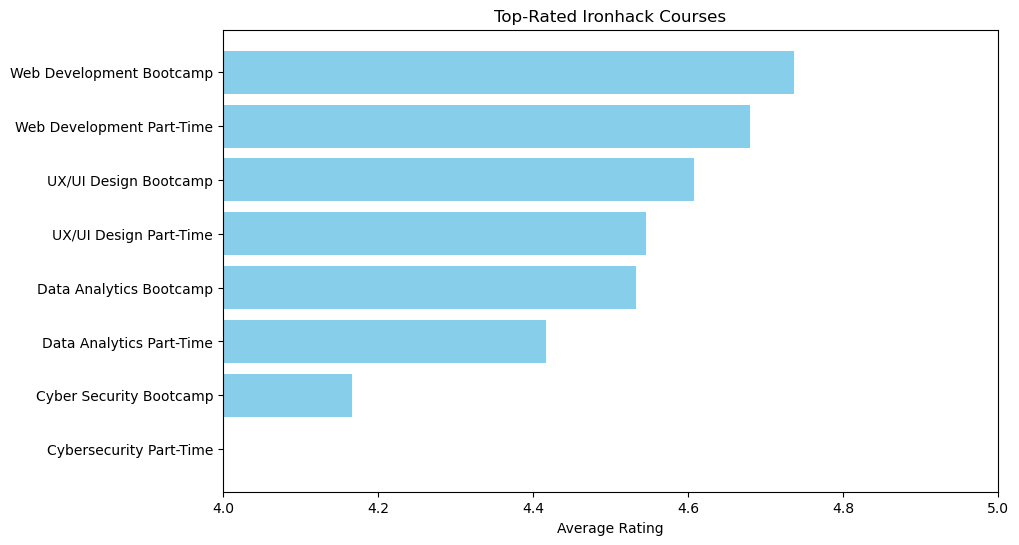

In [541]:
import matplotlib.pyplot as plt

# Data for the graph
coursesar = average_course_ratings.index
ratings = average_course_ratings.values

plt.figure(figsize=(10, 6))
plt.barh(coursesar, ratings, color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top-Rated Ironhack Courses')
plt.xlim(4, 5)  # Setting x-axis limit for better visual emphasis on rating variations
plt.gca().invert_yaxis()
plt.show()

In [208]:
# Filter comments related to Ironhack
ironhack_comments = comments[comments['school_name'].str.lower() == 'ironhack']

# Calculate average ratings for Ironhack
ironhack_avg_scores = ironhack_comments[['overall_score', 'overall_rating', 'curriculum_rating', 'job_support_rating']].mean()

# Calculate average ratings for all schools
overall_avg_scores = comments.groupby('school_name')[['overall_score', 'overall_rating', 'curriculum_rating', 'job_support_rating']].mean()

# Top competitors based on the number of comments
top_competitors = comments['school_name'].value_counts().head(5)

# Display results
ironhack_avg_scores

overall_score         4.714617
overall_rating        4.774169
curriculum_rating     4.577726
job_support_rating    4.508894
dtype: float64

In [210]:
overall_avg_scores

overall_score  overall_rating  curriculum_rating  \
school_name                                                                 
4geeks-academy                4.881215        4.895028           4.817680   
actualize                     4.874082        4.946004           4.714903   
clarusway                     4.908642        4.909465           4.917695   
codesmith                     4.905723        4.915663           4.810241   
dataquest                     4.738567        4.829352           4.774744   
designlab                     4.577495        4.733198           4.585540   
evolve-security-academy       4.778761        4.845133           4.805310   
ironhack                      4.714617        4.774169           4.577726   
jedha                         4.958204        4.981424           4.965944   
la-capsule                    4.935014        4.974790           4.966387   
le-wagon                      4.910811        4.970450           4.840721   
learningfuze                  4.984659        4.982955           4.897727   
level-effect                  4.919048        5.000000           4.904762   
shecodes                      4.881825        4.972632           4.924211   
springboard                   4.592168        4.677596           4.573163   
syntax-technologies           5.000000        5.000000           5.000000   
wbs-coding-school             4.795133        4.920354           4.845133   

                         job_support_rating  
school_name                                  
4geeks-academy                     4.707182  
actualize                          4.477322  
clarusway                          4.835391  
codesmith                          4.346386  
dataquest                          3.088737  
designlab                          2.957230  
evolve-security-academy            4.491150  
ironhack                           4.508894  
jedha                              4.634675  
la-capsule                         4.820728  
le-wagon                           4.498378  
learningfuze                       4.704545  
level-effect                       4.857143  
shecodes                           4.058947  
springboard                        4.141469  
syntax-technologies                5.000000  
wbs-coding-school                  4.530973

In [212]:
top_competitors

school_name
le-wagon       2775
springboard    1647
shecodes       1425
ironhack       1293
designlab       982
Name: count, dtype: int64

# Analysis Results

## Ironhack's Average Ratings:

- **Overall Score:** 4.71
- **Overall Rating:** 4.77
- **Curriculum Rating:** 4.58
- **Job Support Rating:** 4.51

## Competitor Average Ratings:

Here are the top competitors based on the number of comments, along with their average ratings:

### Le Wagon
- **Overall Score:** 4.91
- **Overall Rating:** 4.97
- **Curriculum Rating:** 4.84
- **Job Support Rating:** 4.50

### Springboard
- **Overall Score:** 4.59
- **Overall Rating:** 4.68
- **Curriculum Rating:** 4.57
- **Job Support Rating:** 4.14

### SheCodes
- **Overall Score:** 4.88
- **Overall Rating:** 4.97
- **Curriculum Rating:** 4.92
- **Job Support Rating:** 4.06

### DesignLab
- **Overall Score:** 4.58
- **Overall Rating:** 4.73
- **Curriculum Rating:** 4.59
- **Job Support Rating:** 2.96

## Strengths and Weaknesses of Ironhack

### Strengths:

1. **Overall Rating and Score:** Ironhack's overall score and rating are competitive, indicating a generally positive perception.
2. **Job Support Rating:** With a job support rating of 4.51, Ironhack is performing well in this area, especially compared to some competitors like DesignLab.

### Weaknesses:

1. **Curriculum Rating:** Ironhack's curriculum rating of 4.58 is lower than several top competitors, such as Le Wagon and SheCodes, which suggests there may be room for improvement in the curriculum.
2. **Average Ratings Comparison:** Although Ironhack's ratings are good, they are slightly lower than the top competitors, indicating potential areas for enhancement to reach the highest tier.

## Recommendations for Enhancements

1. **Curriculum Improvement:** Focus on gathering detailed feedback on the curriculum from students and alumni to identify specific areas for improvement. Consider updating the curriculum to incorporate more in-demand skills and technologies.
2. **Job Support Programs:** Even though Ironhack's job support rating is strong, there is always room for enhancement. Consider offering more personalized career coaching, expanding the network of hiring partners, and hosting more job fairs and networking events.
3. **Student Engagement:** Increase efforts to engage with current and prospective students through webinars, workshops, and community events. This can help in boosting overall ratings and attracting more positive reviews.
4. **Marketing and Outreach:** Highlight Ironhack's strengths in job support and overall satisfaction in marketing materials to attract prospective students. Additionally, leverage alumni success stories to build a strong brand reputation.

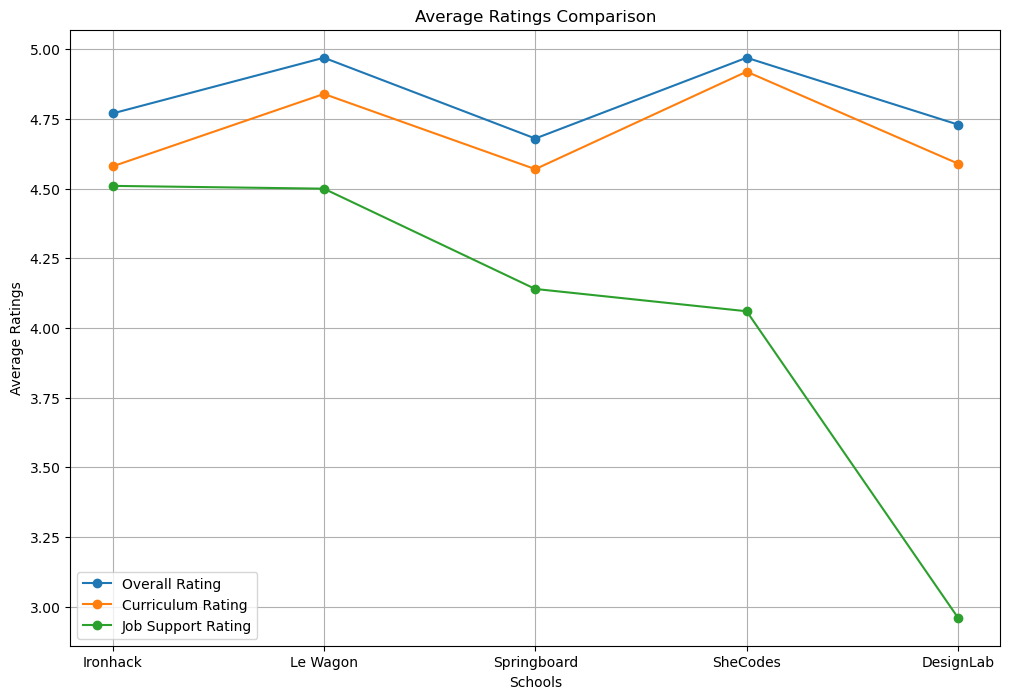

In [215]:
import matplotlib.pyplot as plt

# Data for Ironhack and its top competitors
competitors = ['Ironhack', 'Le Wagon', 'Springboard', 'SheCodes', 'DesignLab']
avg_overall_ratings = [4.77, 4.97, 4.68, 4.97, 4.73]
avg_curriculum_ratings = [4.58, 4.84, 4.57, 4.92, 4.59]
avg_job_support_ratings = [4.51, 4.50, 4.14, 4.06, 2.96]

x = range(len(competitors))

plt.figure(figsize=(12, 8))

plt.plot(x, avg_overall_ratings, marker='o', label='Overall Rating')
plt.plot(x, avg_curriculum_ratings, marker='o', label='Curriculum Rating')
plt.plot(x, avg_job_support_ratings, marker='o', label='Job Support Rating')

plt.xticks(x, competitors)
plt.xlabel('Schools')
plt.ylabel('Average Ratings')
plt.title('Average Ratings Comparison')
plt.legend()
plt.grid(True)

plt.show()

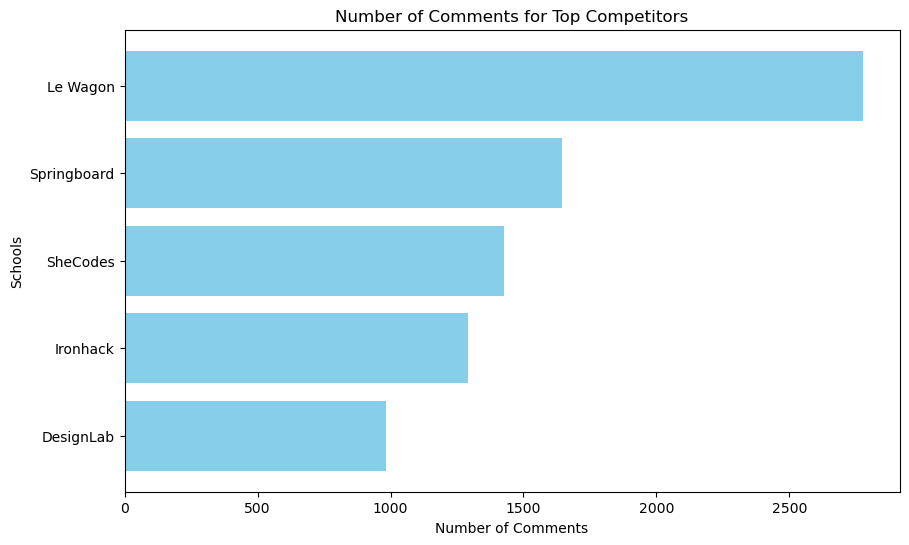

In [217]:
# Data for the number of comments
top_competitors = ['Le Wagon', 'Springboard', 'SheCodes', 'Ironhack', 'DesignLab']
comment_counts = [2775, 1646, 1425, 1293, 982]

plt.figure(figsize=(10, 6))

plt.barh(top_competitors, comment_counts, color='skyblue')
plt.xlabel('Number of Comments')
plt.ylabel('Schools')
plt.title('Number of Comments for Top Competitors')
plt.gca().invert_yaxis()

plt.show()

In [219]:
ironhack_comments

comment_id  school_id school_name                       user_name  \
0         309849      10828    ironhack                       Anonymous   
1         309479      10828    ironhack                 Patrick Marques   
2         308683      10828    ironhack  Harikrishnan Ramakrishnapillai   
3         307433      10828    ironhack                    Sorin Tuinea   
4         307350      10828    ironhack                    Kasia Luksza   
...          ...        ...         ...                             ...   
1288      231772      10828    ironhack                       Anonymous   
1289      231636      10828    ironhack                 Marcos Sorribas   
1290      231611      10828    ironhack                   Xabier Vicuña   
1291      231609      10828    ironhack                             JHD   
1292      231815      10828    ironhack           Enrique Isasi Velasco   

      anonymous  graduating_year  \
0          True             2024   
1         False             2024   
2         False             2023   
3         False             2023   
4         False             2023   
...         ...              ...   
1288      False             2014   
1289      False             2014   
1290      False             2014   
1291      False             2014   
1292      False             2014   

                                                tagline created_at  \
0                                        Data Analytics 2024-04-03   
1     An intense experience full of emotions but at ... 2024-03-19   
2                                        It was amazing 2024-02-15   
3                       I would definitely recommend it 2023-12-22   
4                   Best learning experience of my life 2023-12-19   
...                                                 ...        ...   
1288  Learn in two months what would otherwise take ... 2014-09-30   
1289  El mejor bootcamp al que he asistido. Una expe... 2014-09-24   
1290            Great experience, I highly recommend it 2014-09-24   
1291                      It was an amazing experience! 2014-09-24   
1292                                   Simply gorgeous. 2014-09-23   

      overall_score  overall_rating  curriculum_rating  job_support_rating  \
0               3.3             4.0                4.0                 2.0   
1               4.0             4.0                4.0                 4.0   
2               4.3             4.0                5.0                 4.0   
3               5.0             5.0                5.0                 5.0   
4               5.0             5.0                5.0                 5.0   
...             ...             ...                ...                 ...   
1288            5.0             5.0                5.0                 5.0   
1289            5.0             5.0                5.0                 5.0   
1290            5.0             5.0                5.0                 5.0   
1291            5.0             5.0                5.0                 5.0   
1292            5.0             5.0                5.0                 5.0   

                                            review_body  \
0     I just Finished the my study , I did the Data ...   
1     Hello, my name is Patrick Marques and I can sa...   
2     I could finish cybersecurity course within 3 m...   
3     I chose Ironhack after reading a lot of review...   
4     Attending this bootcamp was hands down the bes...   
...                                                 ...   
1288  I can fully recommend IronHack for any of you ...   
1289  Asistí al primer bootcamp de desarrollo de iOS...   
1290  Excellent product. Great experience. Worth eve...   
1291  I was part of the first English run of Ironhac...   
1292  I attended the Ironhack Madrid Bootcamp on Jan...   

                                  program                 program_cat  
0                Data Analytics Part-Time  Data Science and Analytics  
1                 Data Analytics Bootcamp

###  Average Ratings by Year

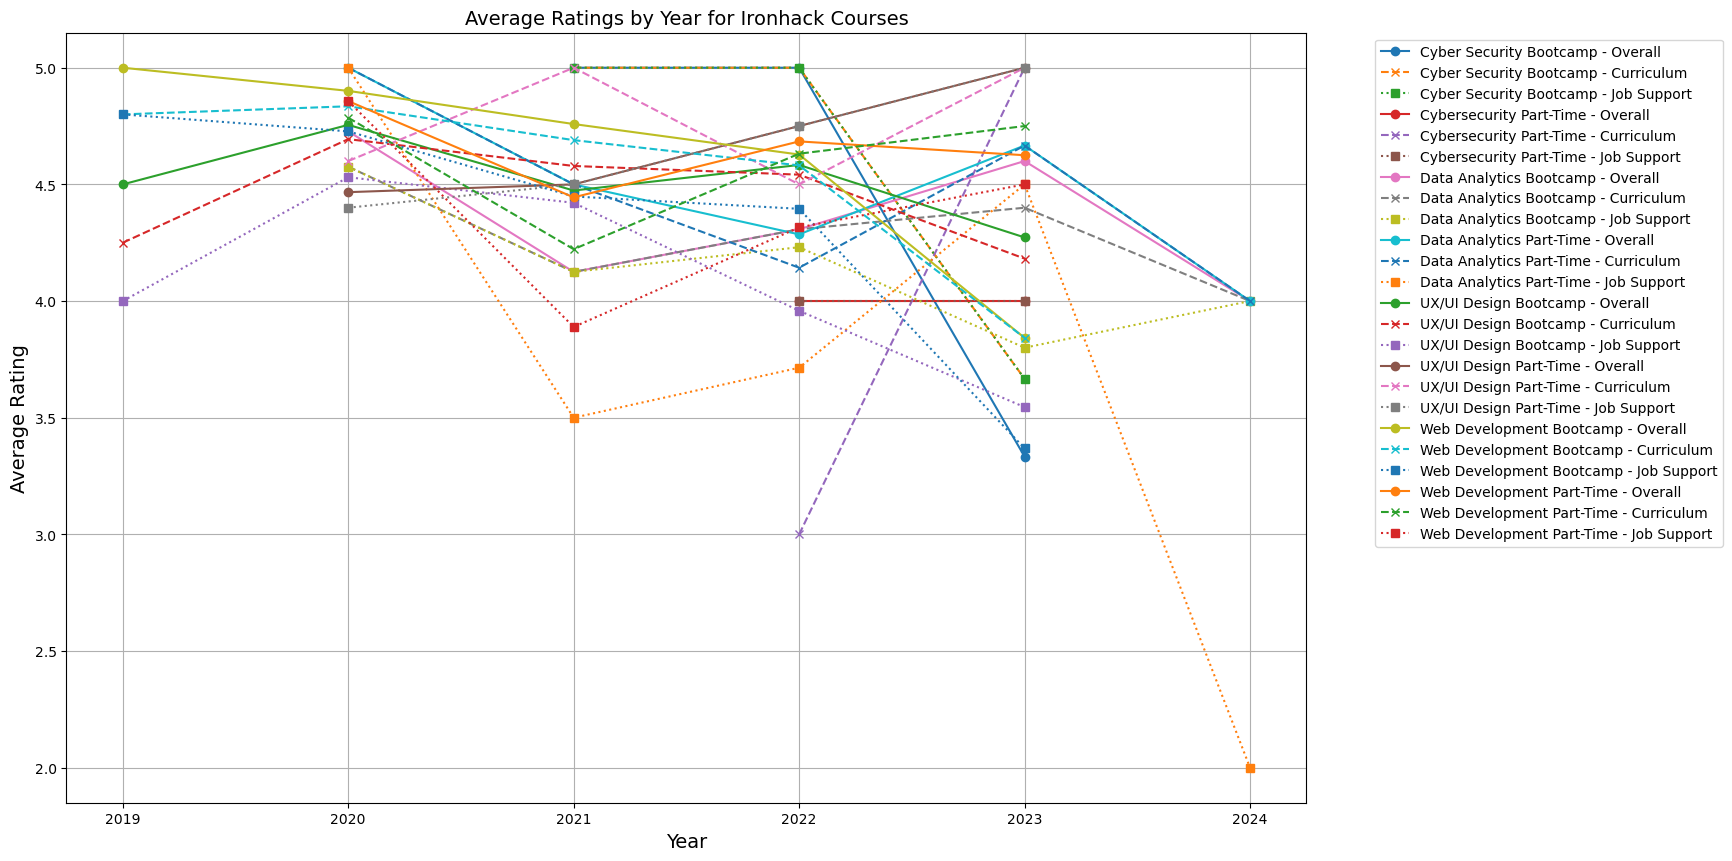

In [222]:

ironhack_course_comments['year'] = pd.to_datetime(ironhack_course_comments['created_at']).dt.year

# Group by course_name and year to calculate average ratings
avg_ratings_by_year = ironhack_course_comments.groupby(['course_name', 'year']).agg({
    'overall_rating': 'mean',
    'curriculum_rating': 'mean',
    'job_support_rating': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(16, 10))
for course in avg_ratings_by_year['course_name'].unique():
    course_data = avg_ratings_by_year[avg_ratings_by_year['course_name'] == course]
    plt.plot(course_data['year'], course_data['overall_rating'], marker='o', label=f"{course} - Overall")
    plt.plot(course_data['year'], course_data['curriculum_rating'], marker='x', linestyle='--', label=f"{course} - Curriculum")
    plt.plot(course_data['year'], course_data['job_support_rating'], marker='s', linestyle=':', label=f"{course} - Job Support")

plt.xlabel('Year',fontsize=14)
plt.ylabel('Average Rating',fontsize=14)
plt.title('Average Ratings by Year for Ironhack Courses',fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Distribution of Comments and Ratings by Course


C:\Users\guada\AppData\Local\Temp\ipykernel_11044\1762221302.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(comments_distribution['course_name'], rotation=45, ha='right')


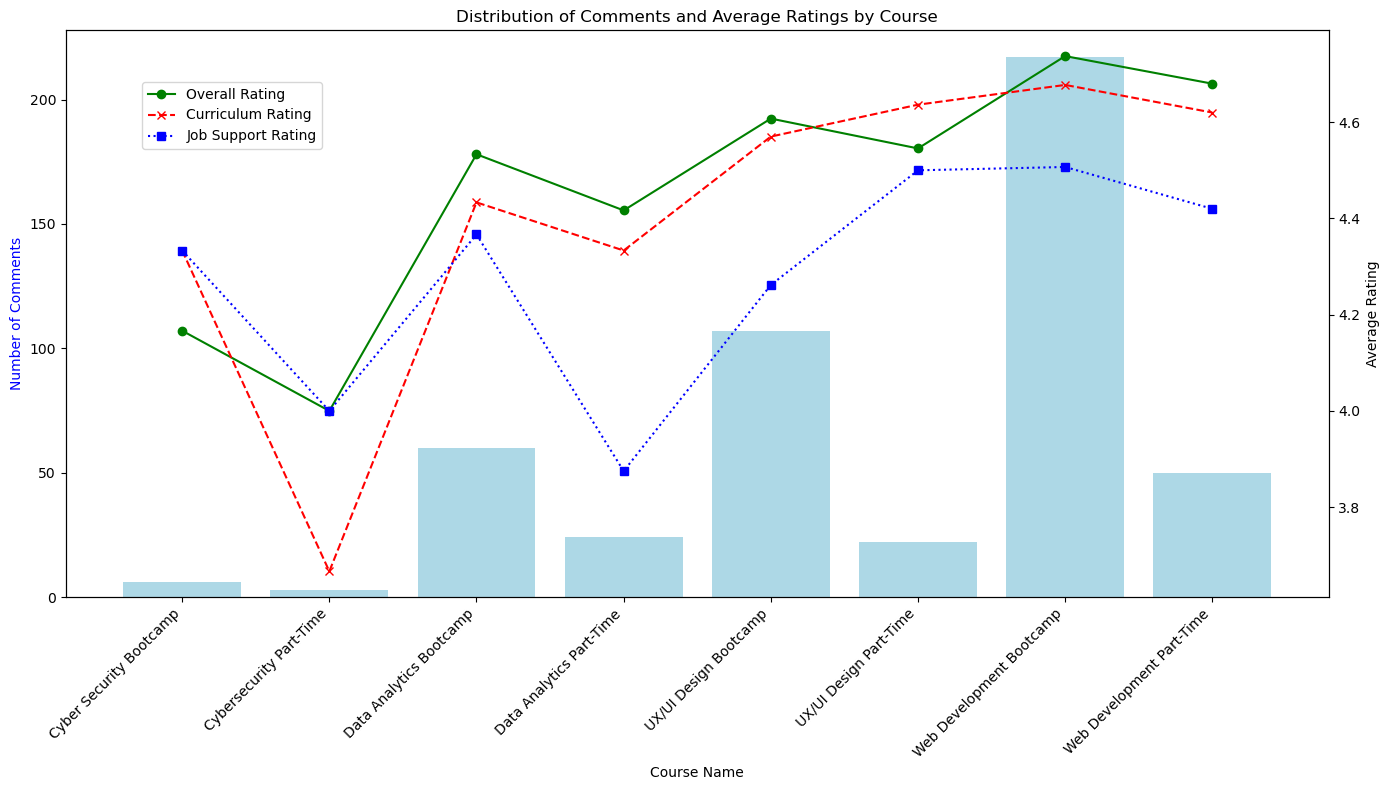

In [225]:
# Group by course_name to calculate distribution of comments and average ratings
comments_distribution = ironhack_course_comments.groupby('course_name').agg({
    'comment_id': 'count',
    'overall_rating': 'mean',
    'curriculum_rating': 'mean',
    'job_support_rating': 'mean'
}).reset_index().rename(columns={'comment_id': 'num_comments'})

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

ax2 = ax1.twinx()
ax1.bar(comments_distribution['course_name'], comments_distribution['num_comments'], color='lightblue')
ax2.plot(comments_distribution['course_name'], comments_distribution['overall_rating'], color='green', marker='o', linestyle='-', label='Overall Rating')
ax2.plot(comments_distribution['course_name'], comments_distribution['curriculum_rating'], color='red', marker='x', linestyle='--', label='Curriculum Rating')
ax2.plot(comments_distribution['course_name'], comments_distribution['job_support_rating'], color='blue', marker='s', linestyle=':', label='Job Support Rating')

ax1.set_xlabel('Course Name')
ax1.set_ylabel('Number of Comments', color='blue')
ax2.set_ylabel('Average Rating', color='black')
ax1.set_xticklabels(comments_distribution['course_name'], rotation=45, ha='right')
ax1.set_title('Distribution of Comments and Average Ratings by Course')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

### Sentiment Analysis on Reviews

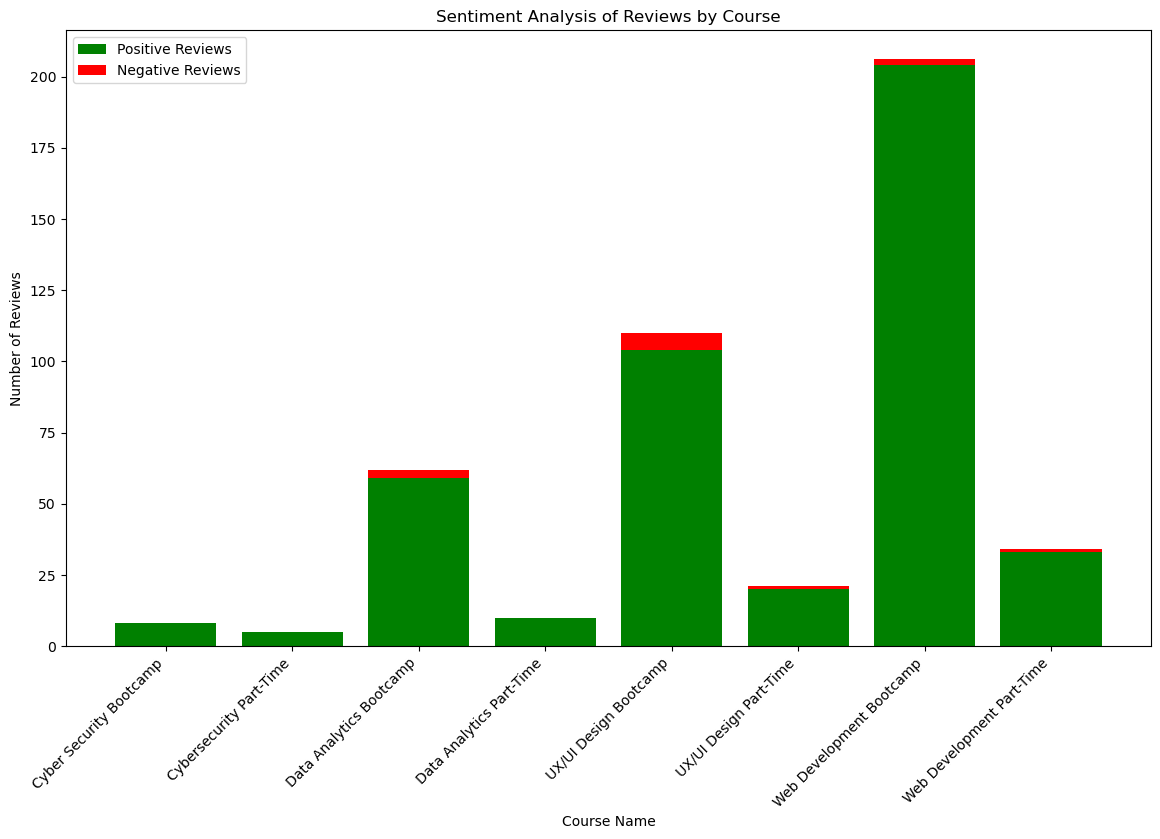

In [228]:
# Define positive and negative words
positive_words = ['good', 'great', 'excellent']
negative_words = ['bad', 'poor', 'terrible']

# Function to count positive and negative words
def sentiment_analysis(text):
    positive_count = sum([text.lower().count(word) for word in positive_words])
    negative_count = sum([text.lower().count(word) for word in negative_words])
    return positive_count, negative_count

# Apply sentiment analysis to review_body
ironhack_course_comments['positive_reviews'] = ironhack_course_comments['review_body'].apply(lambda x: sentiment_analysis(x)[0])
ironhack_course_comments['negative_reviews'] = ironhack_course_comments['review_body'].apply(lambda x: sentiment_analysis(x)[1])

# Group by course_name to calculate sentiment analysis
sentiment_distribution = ironhack_course_comments.groupby('course_name').agg({
    'positive_reviews': 'sum',
    'negative_reviews': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(sentiment_distribution['course_name'], sentiment_distribution['positive_reviews'], color='green', label='Positive Reviews')
plt.bar(sentiment_distribution['course_name'], sentiment_distribution['negative_reviews'], color='red', bottom=sentiment_distribution['positive_reviews'], label='Negative Reviews')

plt.xlabel('Course Name')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews by Course')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

### Top Rated Courses by Job Support

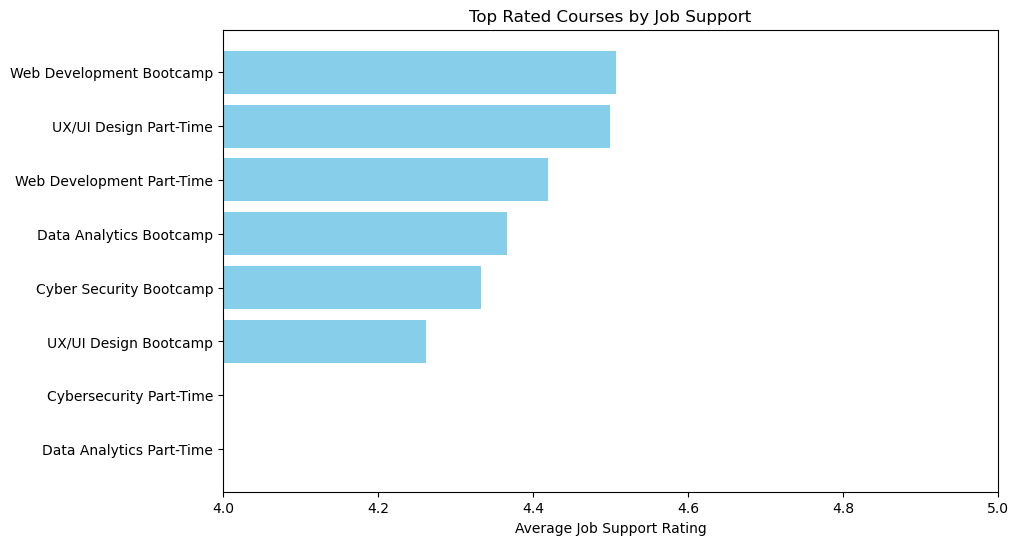

In [231]:
# Group by course_name to calculate average job support ratings
job_support_ratings = ironhack_course_comments.groupby('course_name')['job_support_rating'].mean().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(job_support_ratings['course_name'], job_support_ratings['job_support_rating'], color='skyblue')
plt.xlabel('Average Job Support Rating')
plt.title('Top Rated Courses by Job Support')
plt.xlim(4, 5)
plt.gca().invert_yaxis()
plt.show()

### Courses with the Most Positive Feedback


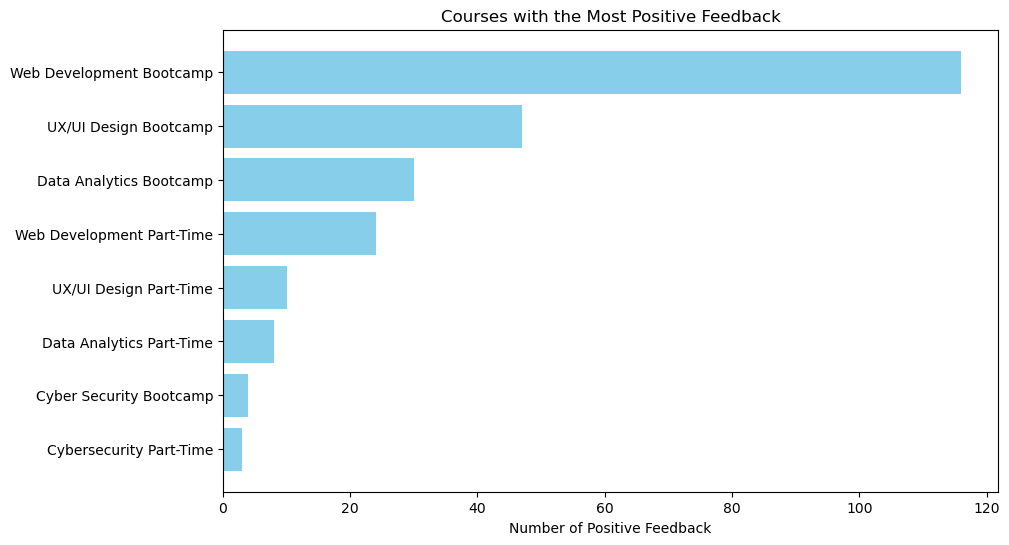

In [234]:
# Count positive feedback for each course
positive_feedback = ironhack_course_comments[ironhack_course_comments['review_body'].str.contains('|'.join(positive_words), case=False, na=False)]
positive_feedback_count = positive_feedback.groupby('course_name').size().reset_index(name='positive_feedback_count').sort_values(by='positive_feedback_count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(positive_feedback_count['course_name'], positive_feedback_count['positive_feedback_count'], color='skyblue')
plt.xlabel('Number of Positive Feedback')
plt.title('Courses with the Most Positive Feedback')
plt.gca().invert_yaxis()
plt.show()

### Trend Analysis of Comments Over Time

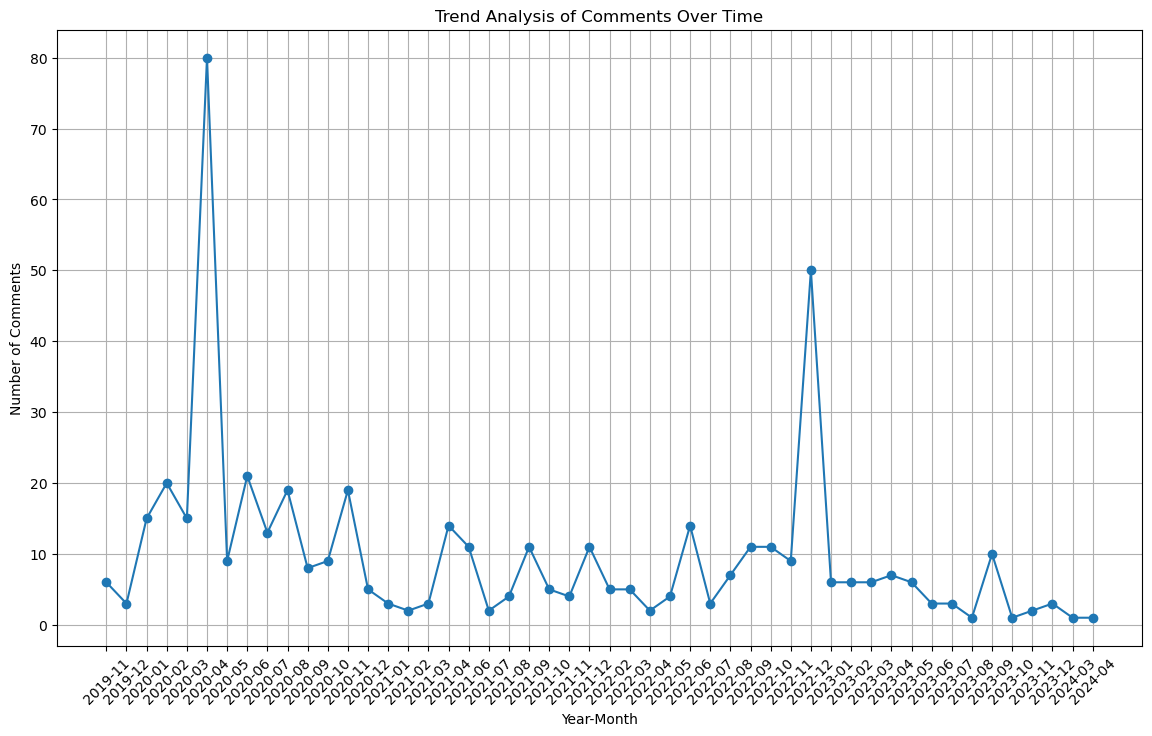

In [237]:
# Extract year and month from created_at
ironhack_course_comments['year_month'] = pd.to_datetime(ironhack_course_comments['created_at']).dt.to_period('M')

# Group by year and month to count comments
trend_analysis = ironhack_course_comments.groupby('year_month').size().reset_index(name='num_comments')

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(trend_analysis['year_month'].astype(str), trend_analysis['num_comments'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.title('Trend Analysis of Comments Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\guada\AppData\Local\Temp\ipykernel_11044\3827363418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ironhack_comments['year_month'] = pd.to_datetime(ironhack_comments['created_at']).dt.to_period('M')


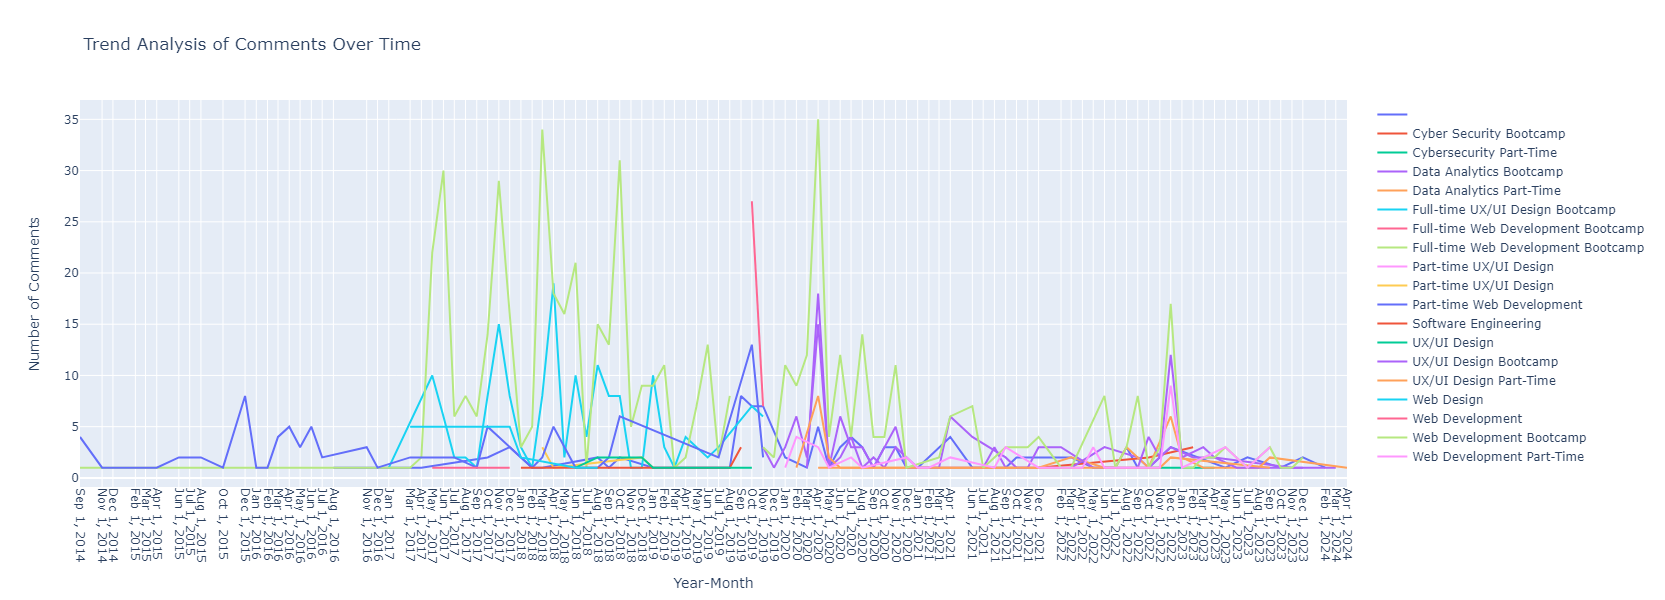

In [239]:
import plotly.graph_objs as go

# Create a time-series plot of comments over time
# Step 1: Filter for Ironhack comments
ironhack_comments = comments[comments['school_name'].str.lower() == 'ironhack']

# Step 2: Create a new column for year_month from the created_at column
ironhack_comments['year_month'] = pd.to_datetime(ironhack_comments['created_at']).dt.to_period('M')

# Step 3: Group by course_name and year_month to count the number of comments
trend_analysis1 = ironhack_comments.groupby(['program', 'year_month']).size().reset_index(name='num_comments')

# Step 4: Plot the time-series data using Plotly
fig = go.Figure()
for course in trend_analysis1['program'].unique():
    course_data = trend_analysis1[trend_analysis1['program'] == course]
    fig.add_trace(go.Scatter(x=course_data['year_month'].astype(str), y=course_data['num_comments'], mode='lines', name=course))

fig.update_layout(
    title='Trend Analysis of Comments Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Number of Comments',
    xaxis=dict(tickmode='array', tickvals=[str(x) for x in trend_analysis1['year_month'].unique()], tickangle=90),
    width=2000,  
    height=600
)
fig.show()

## Price Comparison Analysis

**Price Comparison Analysis**
**Objective**: Compare the pricing of Ironhack's courses with its competitors.

Analysis Steps:

- Average Price Comparison:
Compare the price_min and price_max for each school.
- Price Range Analysis:
Analyze and visualize the price ranges of courses offered by Ironhack versus competitors.

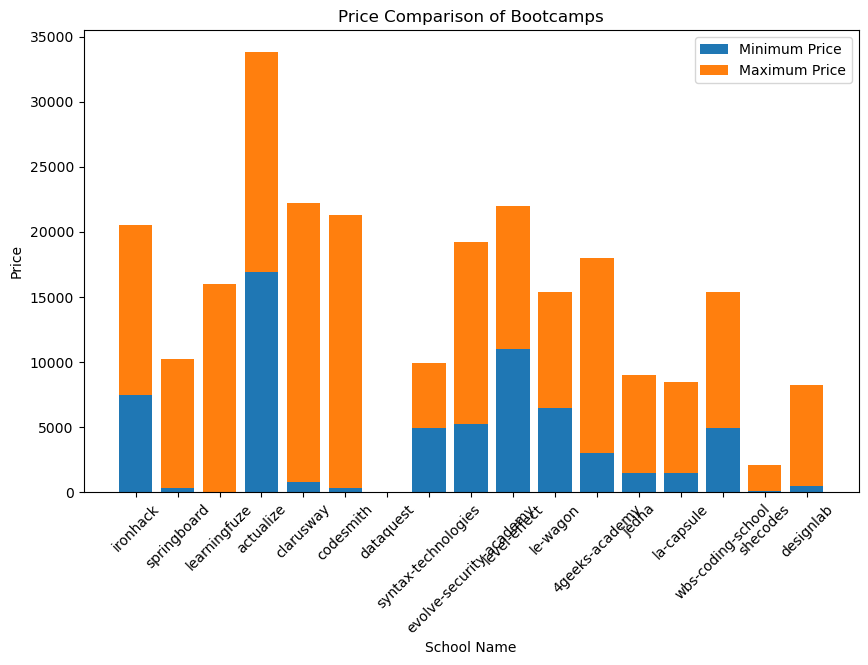

In [248]:
# Average price comparison
avg_prices = schools[['school_name', 'price_min', 'price_max']]

# Plotting average prices
plt.figure(figsize=(10, 6))
plt.bar(avg_prices['school_name'], avg_prices['price_min'], label='Minimum Price')
plt.bar(avg_prices['school_name'], avg_prices['price_max'], bottom=avg_prices['price_min'], label='Maximum Price')
plt.xlabel('School Name')
plt.ylabel('Price')
plt.title('Price Comparison of Bootcamps')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Value for Money Analysis

**Objective**: Assess whether the prices charged by Ironhack offer good value for money compared to its competitors based on ratings.

Analysis Steps:

- Price vs. Rating Correlation:
Analyze the correlation between course prices and overall ratings.
- Price per Rating Point:
Calculate the price per rating point for each school to understand value for money.

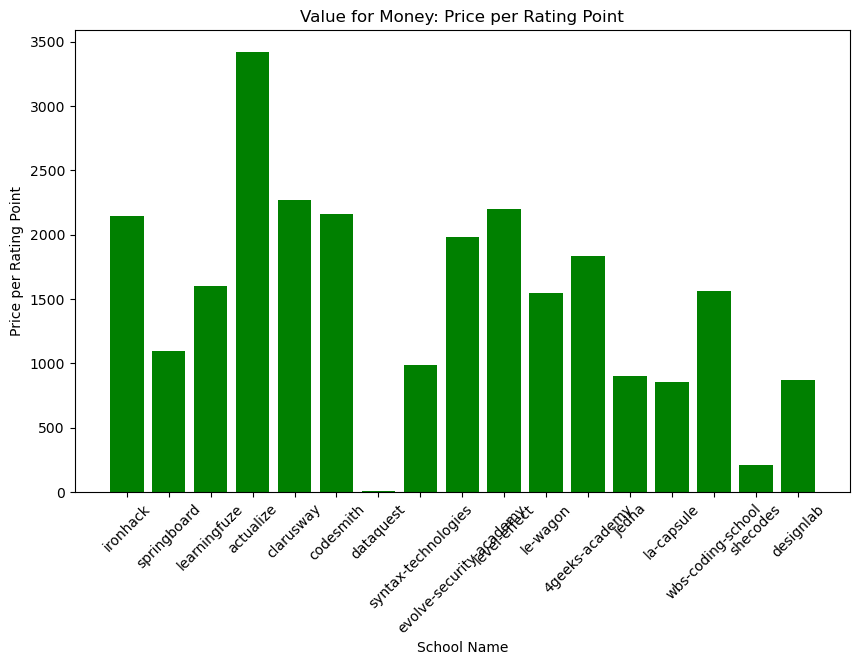

In [271]:
# Merge schools with comments to get ratings
merged_df1 = pd.merge(schools, comments, on='school_id')

# Calculate average rating per school
avg_ratings = merged_df1.groupby('school_name_x')['overall_rating'].mean().reset_index()

# Merge with price data
price_rating = pd.merge(avg_prices, avg_ratings, left_on='school_name', right_on='school_name_x')

# Calculate price per rating point
price_rating['price_per_rating'] = (price_rating['price_min'] + price_rating['price_max']) / 2 / price_rating['overall_rating']

# Plot price per rating point
plt.figure(figsize=(10, 6))
plt.bar(price_rating['school_name'], price_rating['price_per_rating'], color='green')
plt.xlabel('School Name')
plt.ylabel('Price per Rating Point')
plt.title('Value for Money: Price per Rating Point')
plt.xticks(rotation=45)
plt.show()



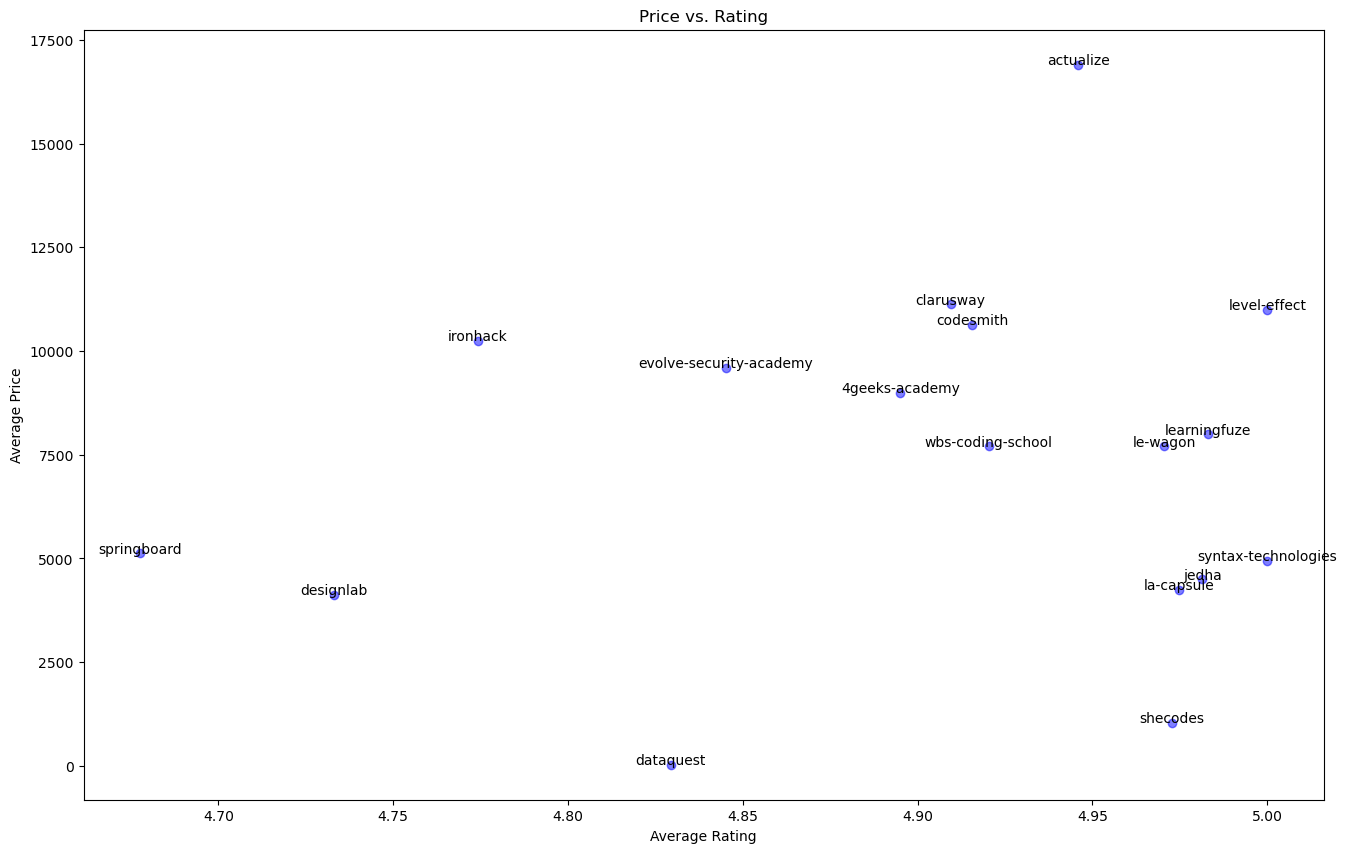

In [301]:
# Scatter plot of price vs. rating
plt.figure(figsize=(16, 10))
avg_price = (price_rating['price_min'] + price_rating['price_max']) / 2
plt.scatter(price_rating['overall_rating'], avg_price, color='blue',alpha=0.5)

# Annotate each point with the school name
for i in range(len(price_rating)):
    plt.annotate(price_rating['school_name'][i], 
                 (price_rating['overall_rating'].iloc[i], avg_price.iloc[i]), 
                 ha='center',fontsize=10)

plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.title('Price vs. Rating')
plt.show()

## Location Analysis

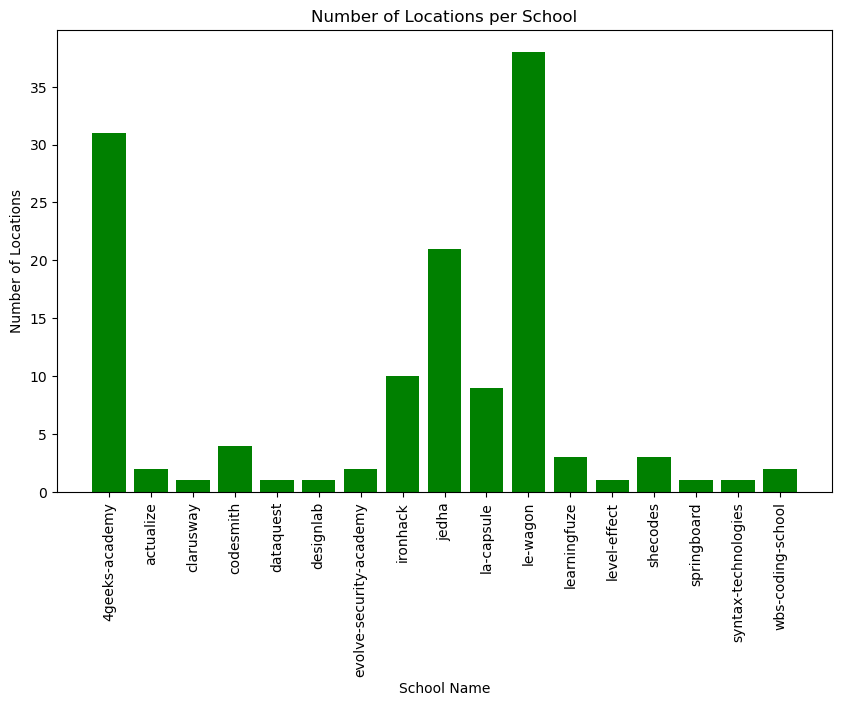

In [312]:
# Count locations by school
location_counts = locations.groupby('school_name').size().reset_index(name='location_count')

# Plot location counts
plt.figure(figsize=(10, 6))
plt.bar(location_counts['school_name'], location_counts['location_count'], color='green')
plt.xlabel('School Name')
plt.ylabel('Number of Locations')
plt.title('Number of Locations per School')
plt.xticks(rotation=90)
plt.show()

## Data Quality Testing Functions

In [447]:
def check_missing_values(df):
    missing = df.isnull().sum()
    print(f"Missing values:\n{missing}")

def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")

# Run data quality tests
check_missing_values(comments)
check_duplicates(comments)
check_missing_values(locations)
check_duplicates(locations)
check_missing_values(badges)
check_duplicates(badges)
check_missing_values(schools)
check_duplicates(schools)
check_missing_values(courses)
check_duplicates(courses)

Missing values:
comment_id            0
school_id             0
school_name           0
user_name             0
anonymous             0
graduating_year       0
tagline               0
created_at            0
overall_score         0
overall_rating        0
curriculum_rating     0
job_support_rating    0
review_body           0
program               0
program_cat           0
dtype: int64
Duplicate rows: 0
Missing values:
location_id     0
school_id       0
school_name     0
country_id      0
country_name    0
city_id         0
city_name       0
dtype: int64
Duplicate rows: 0
Missing values:
badge_id       0
school_id      0
school_name    0
badge_name     0
keyword        0
description    0
dtype: int64
Duplicate rows: 0
Missing values:
school_id      0
school         0
website        0
description    0
price_min      0
price_max      0
dtype: int64
Duplicate rows: 0
Missing values:
0
Duplicate rows: 0


## Potential plots for the presentation

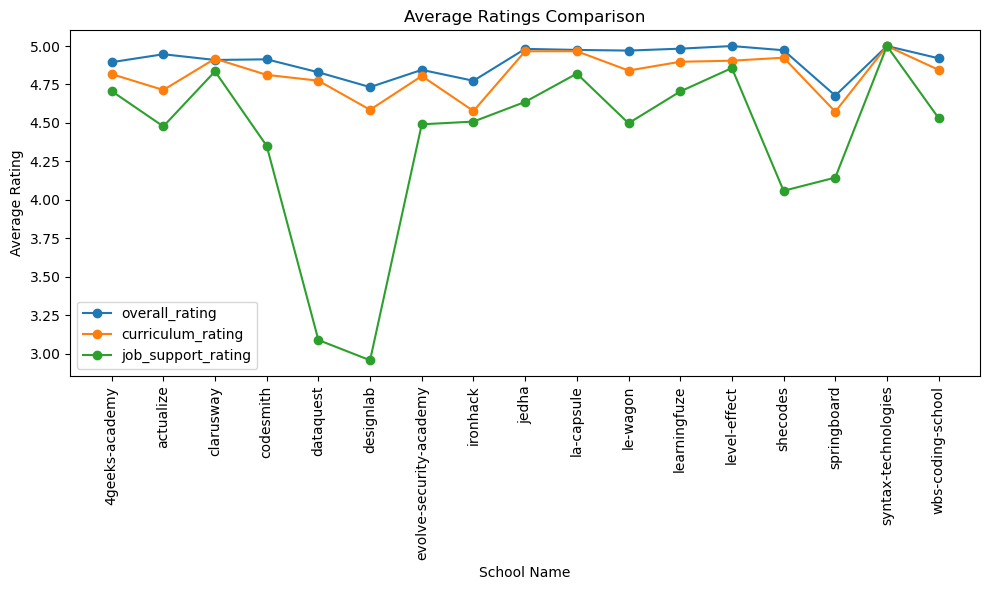

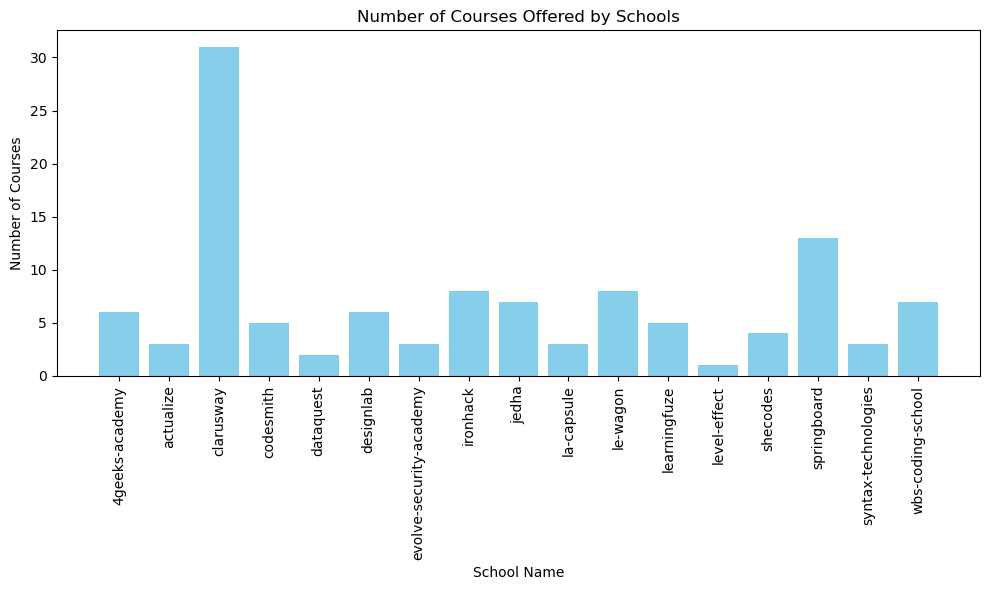

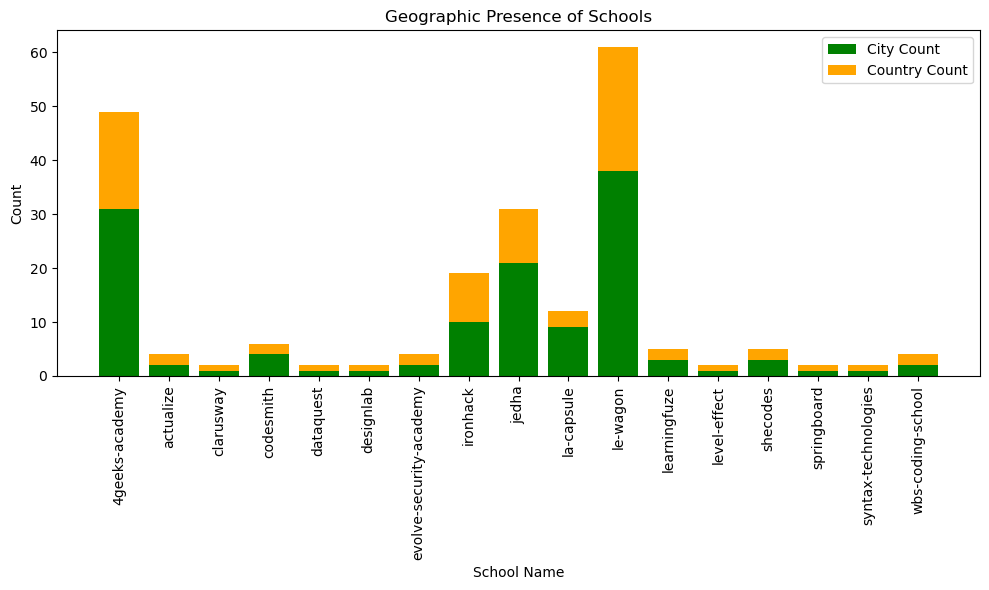

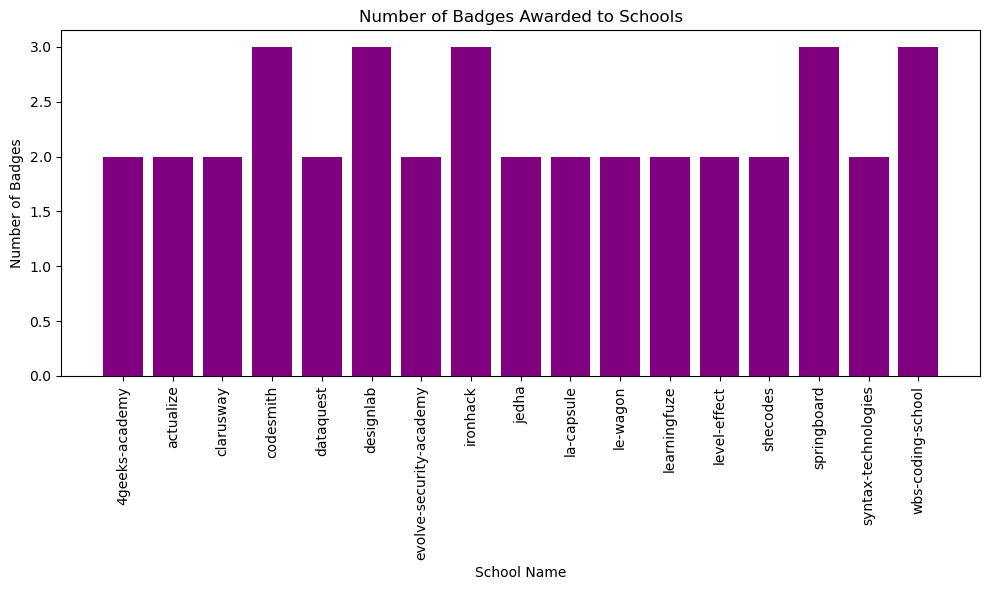

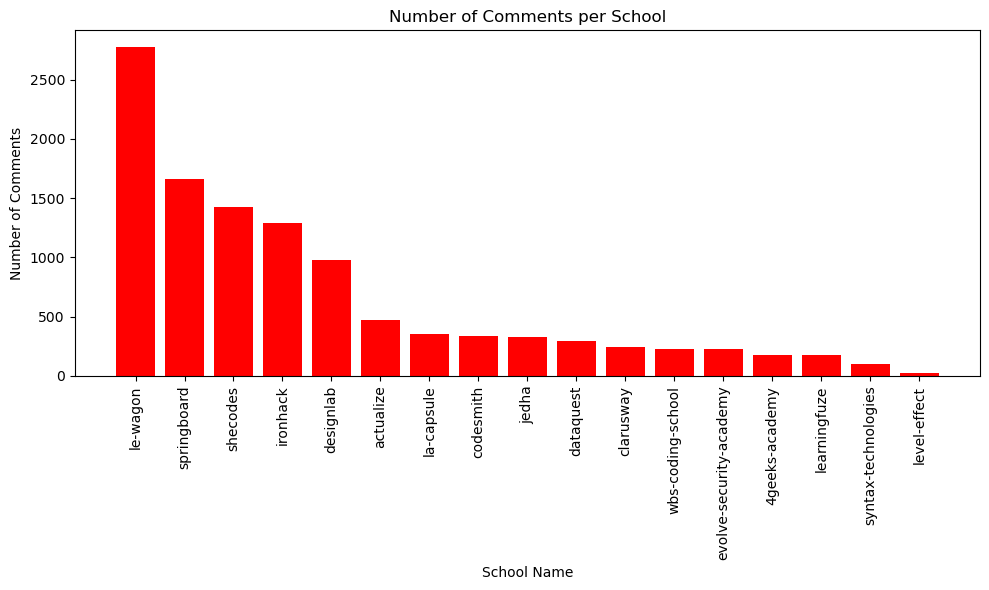

C:\Users\guada\AppData\Local\Temp\ipykernel_29168\3790897034.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ironhack_comments['year'] = pd.to_datetime(ironhack_comments['created_at']).dt.year


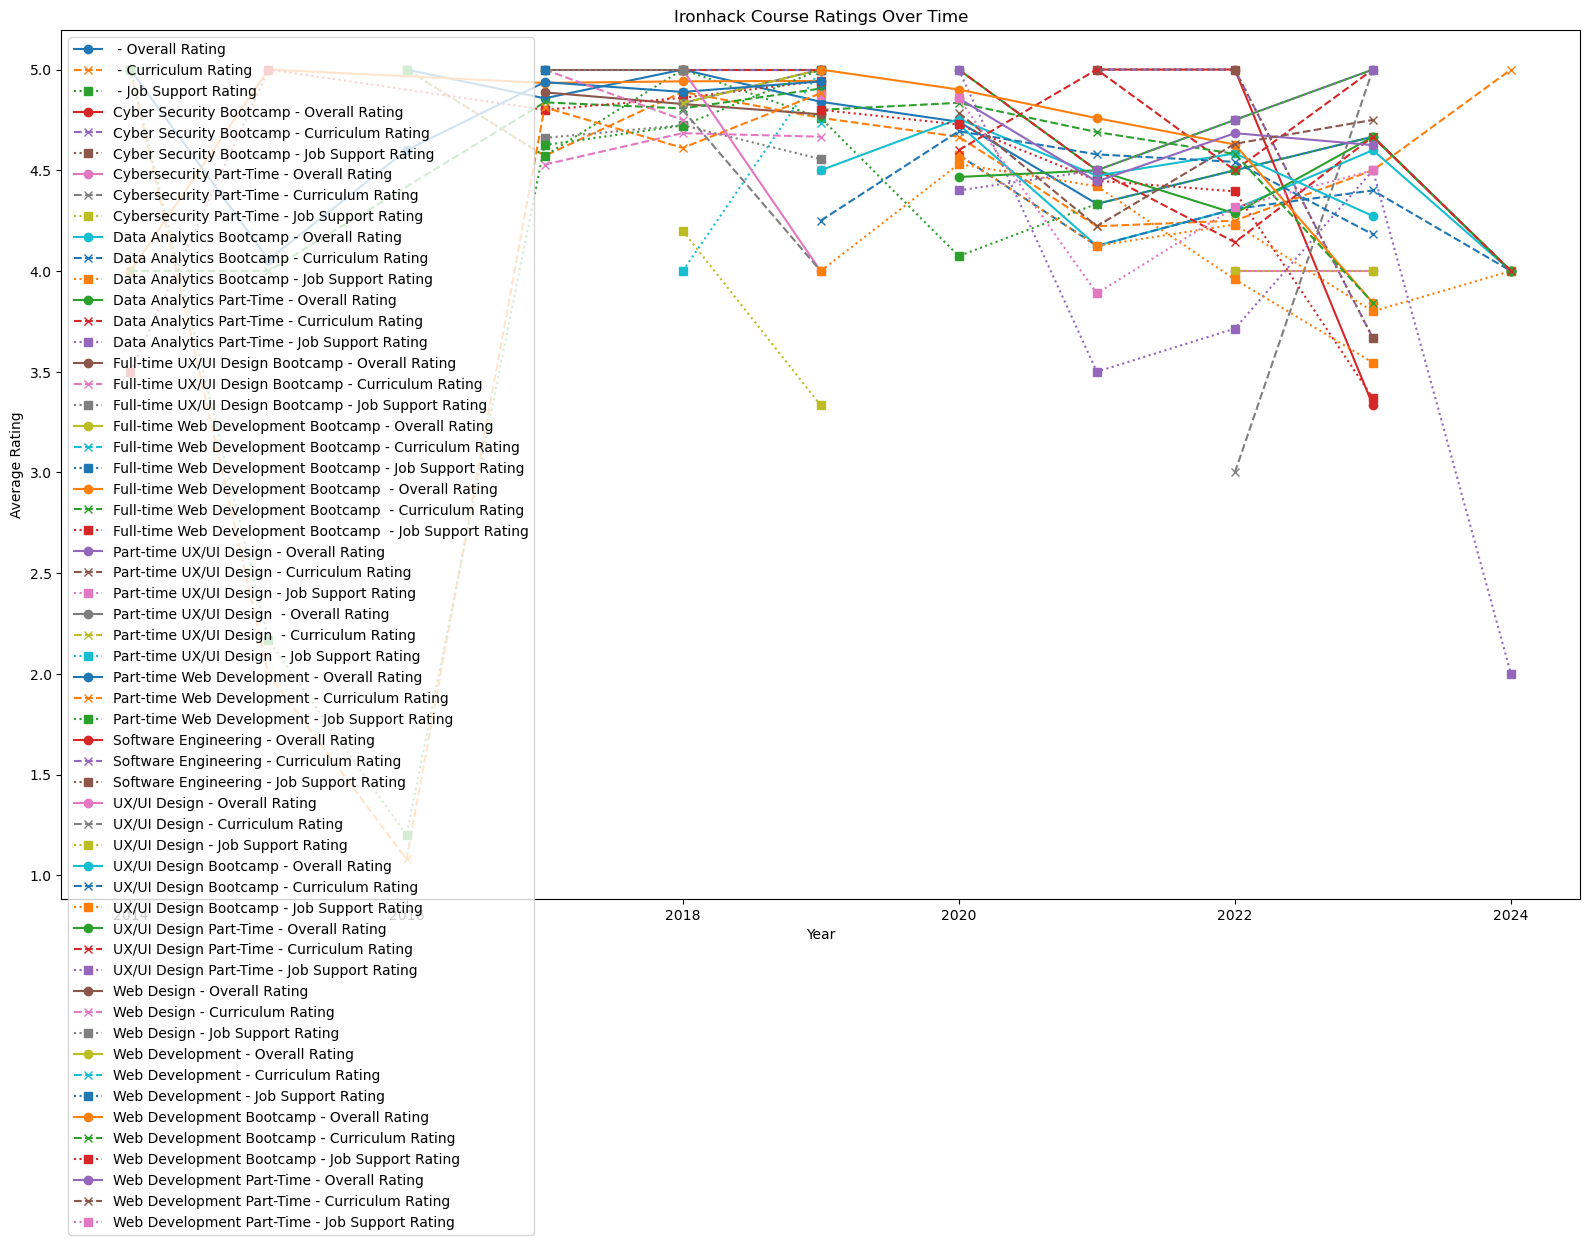

C:\Users\guada\AppData\Local\Temp\ipykernel_29168\3790897034.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(course_comment_rating['program'], rotation=90)


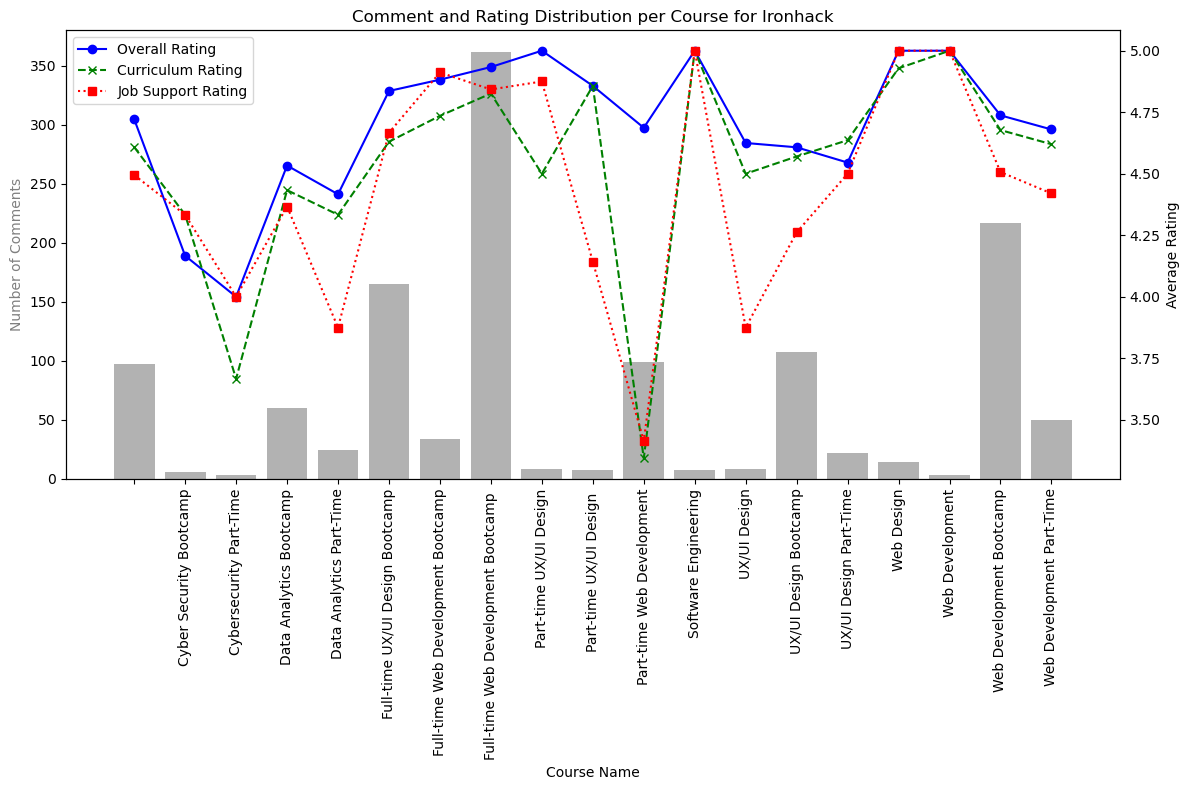

C:\Users\guada\AppData\Local\Temp\ipykernel_29168\3790897034.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ironhack_comments['positive_reviews'] = ironhack_comments['review_body'].apply(lambda x: any(kw in x.lower() for kw in positive_keywords)).astype(int)
C:\Users\guada\AppData\Local\Temp\ipykernel_29168\3790897034.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ironhack_comments['negative_reviews'] = ironhack_comments['review_body'].apply(lambda x: any(kw in x.lower() for kw in negative_key

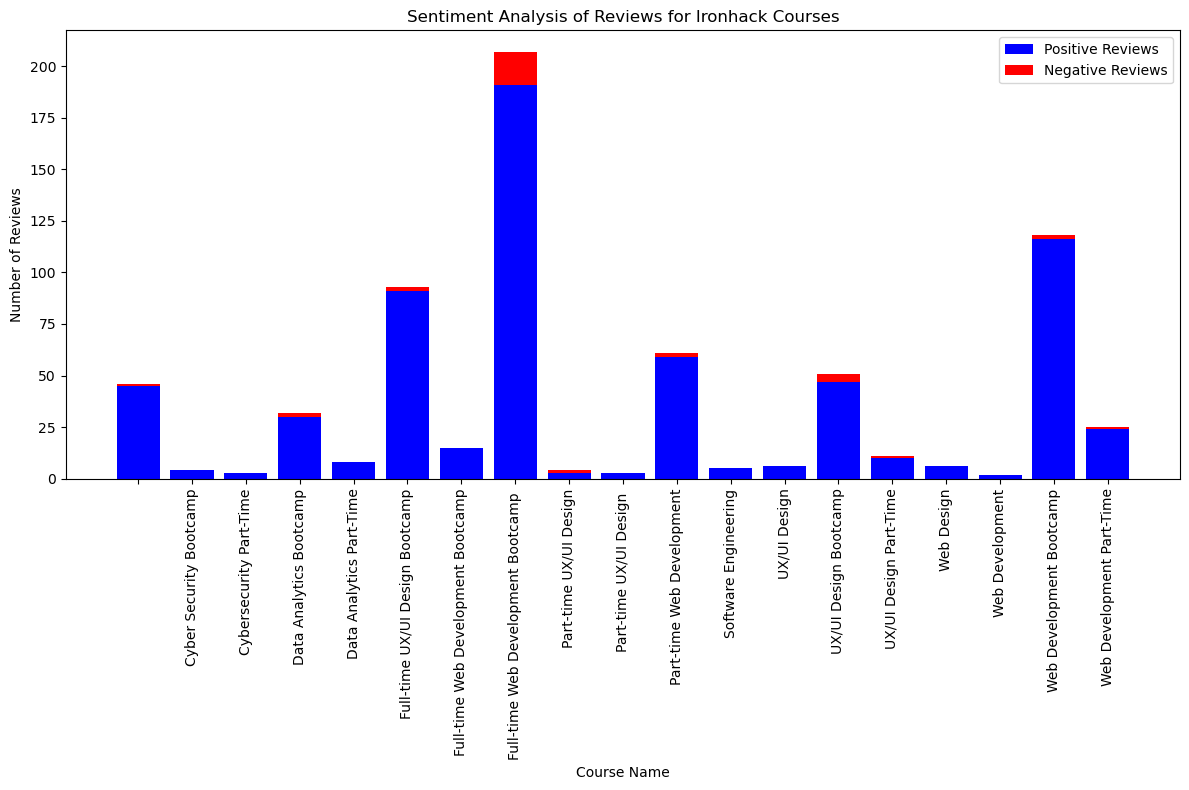

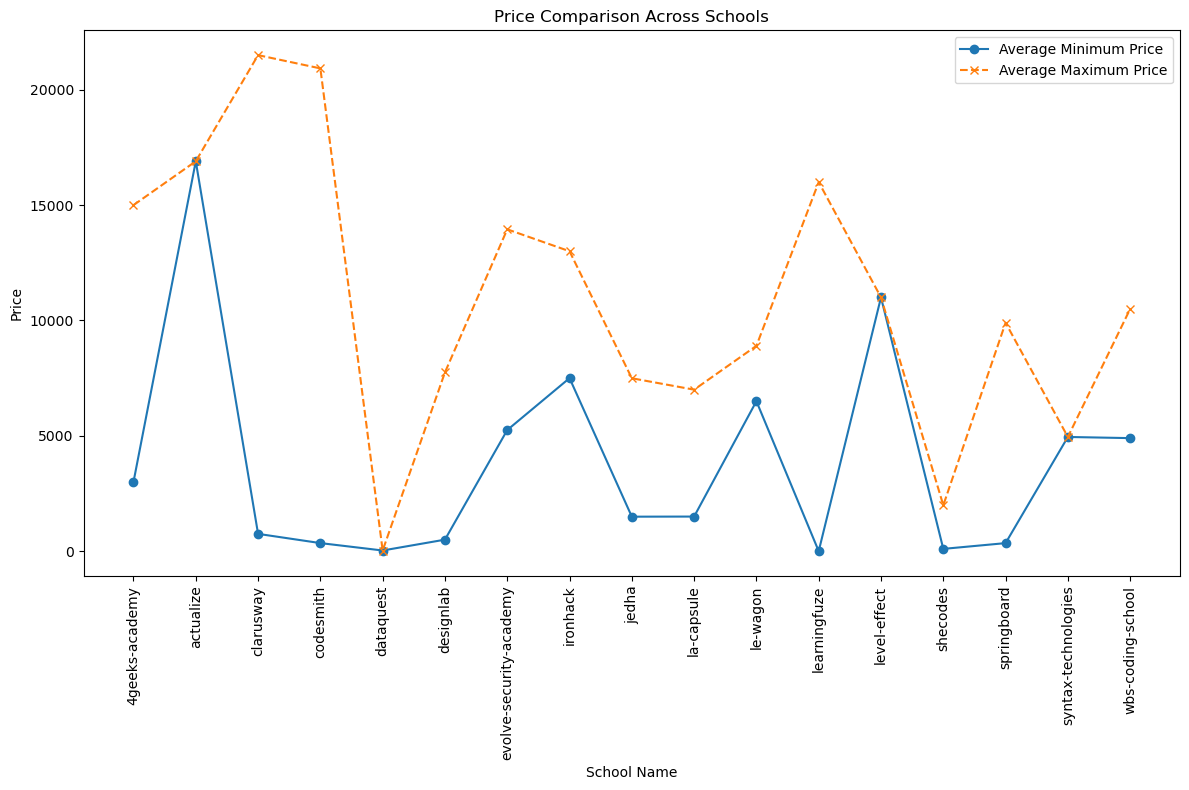

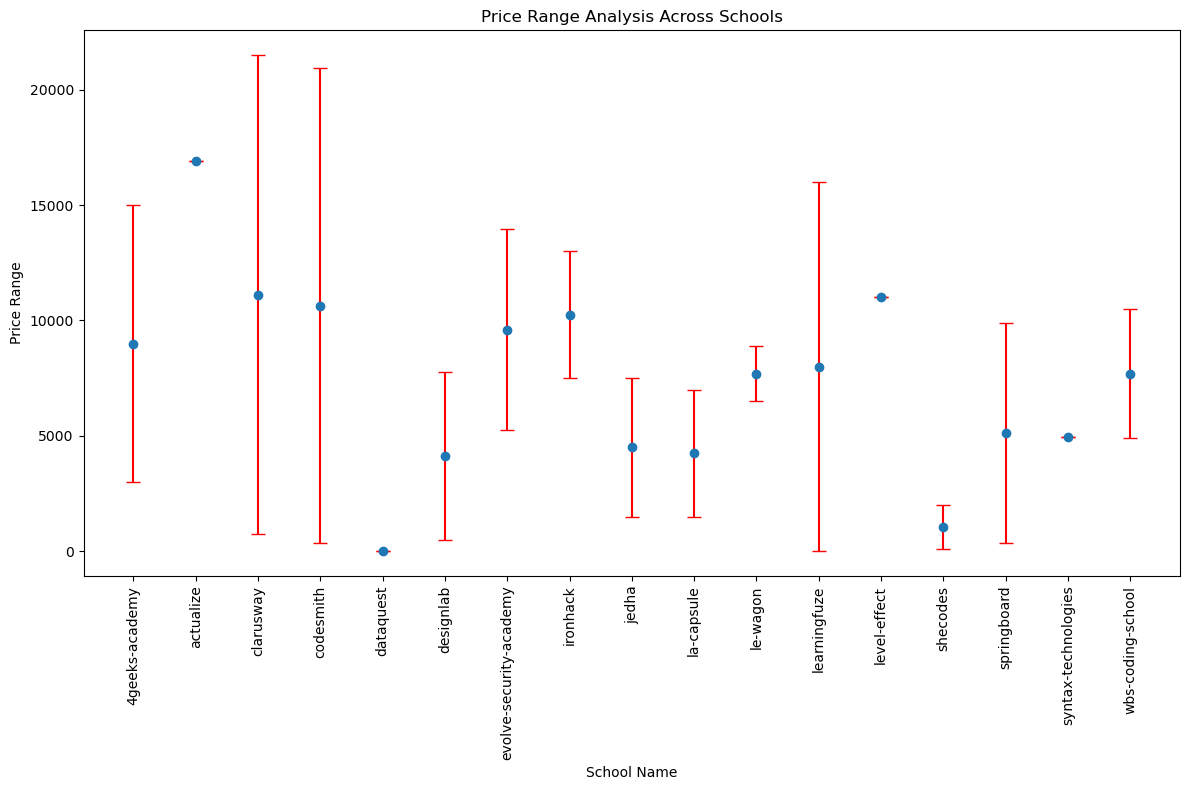

In [109]:


# Analysis and plotting

# Average Ratings Comparison
avg_ratings = comments.groupby('school_name').agg({
    'overall_rating': 'mean',
    'curriculum_rating': 'mean',
    'job_support_rating': 'mean'
}).reset_index()

# Plot average ratings comparison
plt.figure(figsize=(10, 6))
for col in ['overall_rating', 'curriculum_rating', 'job_support_rating']:
    plt.plot(avg_ratings['school_name'], avg_ratings[col], marker='o', label=col)
plt.xlabel('School Name')
plt.ylabel('Average Rating')
plt.title('Average Ratings Comparison')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('average_ratings_comparison.png')
plt.show()

# Number of Courses Offered by Schools
course_count = courses.groupby('school_name').size().reset_index(name='course_count')

# Plot number of courses offered
plt.figure(figsize=(10, 6))
plt.bar(course_count['school_name'], course_count['course_count'], color='skyblue')
plt.xlabel('School Name')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered by Schools')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('courses_offered.png')
plt.show()

# Geographic Presence of Schools
location_count = locations.groupby('school_name').agg({
    'city_name': pd.Series.nunique,
    'country_name': pd.Series.nunique
}).reset_index().rename(columns={'city_name': 'city_count', 'country_name': 'country_count'})

# Plot geographic presence
plt.figure(figsize=(10, 6))
plt.bar(location_count['school_name'], location_count['city_count'], color='green', label='City Count')
plt.bar(location_count['school_name'], location_count['country_count'], color='orange', bottom=location_count['city_count'], label='Country Count')
plt.xlabel('School Name')
plt.ylabel('Count')
plt.title('Geographic Presence of Schools')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('geographic_presence.png')
plt.show()

# Number of Badges Awarded to Schools
badge_count = badges.groupby('school_name').size().reset_index(name='badge_count')

# Plot number of badges awarded
plt.figure(figsize=(10, 6))
plt.bar(badge_count['school_name'], badge_count['badge_count'], color='purple')
plt.xlabel('School Name')
plt.ylabel('Number of Badges')
plt.title('Number of Badges Awarded to Schools')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('badges_awarded.png')
plt.show()

# Number of Comments per School
comment_count = comments.groupby('school_name').size().reset_index(name='comment_count').sort_values(by='comment_count', ascending=False)

# Plot number of comments per school
plt.figure(figsize=(10, 6))
plt.bar(comment_count['school_name'], comment_count['comment_count'], color='red')
plt.xlabel('School Name')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('comments_per_school.png')
plt.show()

# Course Ratings Over Time for Ironhack
ironhack_comments = comments[comments['school_name'].str.lower() == 'ironhack']
ironhack_comments['year'] = pd.to_datetime(ironhack_comments['created_at']).dt.year
course_ratings_by_year = ironhack_comments.groupby(['program', 'year']).agg({
    'overall_rating': 'mean',
    'curriculum_rating': 'mean',
    'job_support_rating': 'mean'
}).reset_index()

# Plot course ratings over time
plt.figure(figsize=(16,12))
for course in course_ratings_by_year['program'].unique():
    course_data = course_ratings_by_year[course_ratings_by_year['program'] == course]
    plt.plot(course_data['year'], course_data['overall_rating'], marker='o', label=f"{course} - Overall Rating")
    plt.plot(course_data['year'], course_data['curriculum_rating'], marker='x', linestyle='--', label=f"{course} - Curriculum Rating")
    plt.plot(course_data['year'], course_data['job_support_rating'], marker='s', linestyle=':', label=f"{course} - Job Support Rating")
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Ironhack Course Ratings Over Time')
plt.legend()
plt.tight_layout()
plt.savefig('ironhack_course_ratings_over_time.png')
plt.show()

# Comment and Rating Distribution per Course for Ironhack
course_comment_rating = ironhack_comments.groupby('program').agg({
    'comment_id': 'count',
    'overall_rating': 'mean',
    'curriculum_rating': 'mean',
    'job_support_rating': 'mean'
}).reset_index().rename(columns={'comment_id': 'num_comments'})

# Plot comment and rating distribution per course
fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
ax1.bar(course_comment_rating['program'], course_comment_rating['num_comments'], color='grey', alpha=0.6)
ax2.plot(course_comment_rating['program'], course_comment_rating['overall_rating'], marker='o', color='b', label='Overall Rating')
ax2.plot(course_comment_rating['program'], course_comment_rating['curriculum_rating'], marker='x', color='g', linestyle='--', label='Curriculum Rating')
ax2.plot(course_comment_rating['program'], course_comment_rating['job_support_rating'], marker='s', color='r', linestyle=':', label='Job Support Rating')

ax1.set_xlabel('Course Name')
ax1.set_ylabel('Number of Comments', color='grey')
ax2.set_ylabel('Average Rating')
ax1.set_xticklabels(course_comment_rating['program'], rotation=90)
ax1.set_title('Comment and Rating Distribution per Course for Ironhack')
ax2.legend()
fig.tight_layout()
plt.savefig('comment_rating_distribution.png')
plt.show()

# Sentiment Analysis
positive_keywords = ['good', 'great', 'excellent']
negative_keywords = ['bad', 'poor', 'terrible']

ironhack_comments['positive_reviews'] = ironhack_comments['review_body'].apply(lambda x: any(kw in x.lower() for kw in positive_keywords)).astype(int)
ironhack_comments['negative_reviews'] = ironhack_comments['review_body'].apply(lambda x: any(kw in x.lower() for kw in negative_keywords)).astype(int)

sentiment_analysis = ironhack_comments.groupby('program').agg({
    'positive_reviews': 'sum',
    'negative_reviews': 'sum'
}).reset_index()

# Plot sentiment analysis
plt.figure(figsize=(12, 8))
plt.bar(sentiment_analysis['program'], sentiment_analysis['positive_reviews'], color='blue', label='Positive Reviews')
plt.bar(sentiment_analysis['program'], sentiment_analysis['negative_reviews'], color='red', bottom=sentiment_analysis['positive_reviews'], label='Negative Reviews')
plt.xlabel('Course Name')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews for Ironhack Courses')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('sentiment_analysis.png')
plt.show()

# Price Comparison
price_comparison = schools.groupby('school_name').agg({
    'price_min': 'mean',
    'price_max': 'mean'
}).reset_index()

# Plot price comparison
plt.figure(figsize=(12, 8))
plt.plot(price_comparison['school_name'], price_comparison['price_min'], marker='o', label='Average Minimum Price')
plt.plot(price_comparison['school_name'], price_comparison['price_max'], marker='x', linestyle='--', label='Average Maximum Price')
plt.xlabel('School Name')
plt.ylabel('Price')
plt.title('Price Comparison Across Schools')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('price_comparison.png')
plt.show()

# Price Range Analysis
price_range = schools.groupby('school_name').agg({
    'price_min': 'min',
    'price_max': 'max'
}).reset_index()

# Plot price range analysis
plt.figure(figsize=(12, 8))
plt.errorbar(price_range['school_name'], (price_range['price_min'] + price_range['price_max']) / 2, 
             yerr=(price_range['price_max'] - price_range['price_min']) / 2, fmt='o', ecolor='r', capsize=5)
plt.xlabel('School Name')
plt.ylabel('Price Range')
plt.title('Price Range Analysis Across Schools')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('price_range_analysis.png')
plt.show()